In [1]:
# System libraries
import re
import os
import unicodedata
import itertools as itt

# Library for file manipulation
import pandas as pd
import numpy as np

# Data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove warnings
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.12.6
Author: Library versions

re        : 2.2.1
platform  : 1.0.8
plotly    : 5.24.1
watermark : 2.5.0
seaborn   : 0.13.2
numpy     : 1.26.4
IPython   : 8.27.0
matplotlib: 3.10.0
pandas    : 2.2.2



In [2]:
file_path_csv = 'E:\\Veri Bilimi Topluluğu\\proje-AID\\github\\Complete_Updated_Autoimmune_Disorder_Dataset.csv'
df = pd.read_csv(file_path_csv, encoding="utf-8")

In [3]:
# Viewing the first 5 data
df.head()

Patient_ID  Age  Gender            Diagnosis  Sickness_Duration_Months  \
0           6   62    Male  Autoimmune orchitis                        41   
1          20   54  Female  Autoimmune orchitis                        41   
2          46   34    Male  Autoimmune orchitis                        86   
3         108   22    Male  Autoimmune orchitis                        43   
4         142   20  Female  Autoimmune orchitis                        50   

   RBC_Count  Hemoglobin  Hematocrit     MCV    MCH  ...  \
0       4.75       13.37       43.11  101.91  28.41  ...   
1       4.32       10.76       39.92   95.96  28.22  ...   
2       4.42       11.91       38.38   80.56  28.40  ...   
3       4.33       12.72       39.99   84.71  26.67  ...   
4       3.99       11.07       43.58   89.87  30.64  ...   

   Anti_epidermal_basement_membrane_IgA  Anti_OmpC  pANCA  \
0                                     0          0      0   
1                                     0          0      0   
2                                     0          0      0   
3                                     0          0      0   
4                                     0          0      0   

   Anti_tissue_transglutaminase  anti_Scl_70  Anti_Mi2  Anti_parietal_cell  \
0                             0            0         0                   0   
1                             0            0         0                   0   
2                             0            0         0                   0   
3                             0            0         0                   0   
4                             0            0         0                   0   

   Progesterone_antibodies  Anti_Sm       MBL  
0                        0        0  0.051675  
1                        0        0  0.065344  
2                        0        0  0.126083  
3                        0        0  0.251571  
4                        0        0  0.459332  

[5 rows x 80 columns]

In [4]:
# Viewing the liast 5 data
df.tail()

Patient_ID  Age  Gender Diagnosis  Sickness_Duration_Months  RBC_Count  \
13807        8323   30  Female    Normal                        76   4.369449   
13808        5192   78    Male    Normal                        34   5.104874   
13809        1185   33    Male    Normal                        56   5.840766   
13810        2559   37  Female    Normal                       110   5.197375   
13811        2048   73    Male    Normal                       112   5.986583   

       Hemoglobin  Hematocrit        MCV        MCH  ...  \
13807   12.616547   40.702933  99.409783  29.852514  ...   
13808   14.749487   42.749227  97.561459  30.820043  ...   
13809   16.979142   47.139018  80.555161  28.324916  ...   
13810   14.351748   42.746795  80.760921  28.409289  ...   
13811   15.815299   42.444557  83.665471  31.380579  ...   

       Anti_epidermal_basement_membrane_IgA  Anti_OmpC  pANCA  \
13807                                     0          0      0   
13808                                     0          0      0   
13809                                     0          0      0   
13810                                     0          0      0   
13811                                     0          0      0   

       Anti_tissue_transglutaminase  anti_Scl_70  Anti_Mi2  \
13807                             0            0         0   
13808                             0            0         0   
13809                             0            0         0   
13810                             1            0         0   
13811                             1            0         0   

       Anti_parietal_cell  Progesterone_antibodies  Anti_Sm       MBL  
13807                   0                        0        0  4.458054  
13808                   0                        0        0  2.398731  
13809                   0                        0        0  4.287405  
13810                   0                        0        0  3.385175  
13811                   0                        0        0  4.477346  

[5 rows x 80 columns]

In [5]:
df.describe()

Patient_ID           Age  Sickness_Duration_Months     RBC_Count  \
count  13812.000000  13812.000000              13812.000000  13812.000000   
mean    4943.404431     49.507023                 62.589125      4.413987   
std     2973.417945     17.659349                 33.604675      0.555170   
min        6.000000     20.000000                  1.000000      3.510000   
25%     2333.250000     34.000000                 34.000000      3.960000   
50%     5192.000000     48.000000                 62.000000      4.400000   
75%     7605.000000     66.000000                 91.000000      4.810000   
max     9999.000000     79.000000                119.000000      6.099889   

         Hemoglobin    Hematocrit           MCV           MCH          MCHC  \
count  13812.000000  13812.000000  13812.000000  13812.000000  13812.000000   
mean      12.855142     41.071055     89.791482     29.218271     33.479772   
std        1.650173      2.941540      8.077185      1.673751      1.407444   
min       10.000000     36.000000     75.090000     26.000000     31.000000   
25%       11.470000     38.620000     82.870000     27.900000     32.310000   
50%       12.920000     41.027491     89.455557     29.270000     33.510000   
75%       14.210000     43.200000     96.725969     30.630000     34.670000   
max       17.195634     50.282139    104.970000     32.000000     35.999406   

                RDW  ...  Anti_epidermal_basement_membrane_IgA     Anti_OmpC  \
count  13812.000000  ...                          13812.000000  13812.000000   
mean      13.877249  ...                              0.004054      0.007385   
std        1.197298  ...                              0.063548      0.085621   
min       11.500689  ...                              0.000000      0.000000   
25%       12.840000  ...                              0.000000      0.000000   
50%       13.810000  ...                              0.000000      0.000000   
75%       14.950000  ...                              0.000000      0.000000   
max       16.000000  ...                              1.000000      1.000000   

              pANCA  Anti_tissue_transglutaminase   anti_Scl_70     Anti_Mi2  \
count  13812.000000                  13812.000000  13812.000000  13812.00000   
mean       0.000724                      0.017593      0.007168      0.00362   
std        0.026899                      0.131473      0.084361      0.06006   
min        0.000000                      0.000000      0.000000      0.00000   
25%        0.000000                      0.000000      0.000000      0.00000   
50%        0.000000                      0.000000      0.000000      0.00000   
75%        0.000000                      0.000000      0.000000      0.00000   
max        1.000000                      1.000000      1.000000      1.00000   

       Anti_parietal_cell  Progesterone_antibodies       Anti_Sm           MBL  
count        13812.000000                  13812.0  13812.000000  13812.000000  
mean             0.001231                      0.0      0.002968      0.653552  
std              0.035063                      0.0      0.054404      1.067056  
min              0.000000                      0.0      0.000000      0.000007  
25%              0.000000                      0.0      0.000000      0.147896  
50%              0.000000                      0.0      0.000000      0.296318  
75%              0.000000                      0.0      0.000000      0.444317  
max              1.000000                      0.0      1.000000      4.999038  

[8 rows x 78 columns]

In [6]:
# Rows and columns
df.shape

(13812, 80)

In [7]:
# Data type
df.dtypes

Patient_ID                    int64
Age                           int64
Gender                       object
Diagnosis                    object
Sickness_Duration_Months      int64
                             ...   
Anti_Mi2                      int64
Anti_parietal_cell            int64
Progesterone_antibodies       int64
Anti_Sm                       int64
MBL                         float64
Length: 80, dtype: object

In [8]:
df['Diagnosis'].unique()

array(['Autoimmune orchitis', 'Rheumatoid arthritis', 'Sjögren syndrome',
       "Graves' disease", 'Systemic lupus erythematosus (SLE)', 'Normal'],
      dtype=object)

In [9]:
df_int =df.copy()

In [10]:
# Ensure Gender and Diagnosis columns are strings and normalized
df_int['Gender'] = df['Gender'].astype(str).str.strip().str.lower()
df_int['Diagnosis'] =df['Diagnosis'].astype(str).str.strip().str.lower()

# Mapping for Gender and Diagnosis columns
gender_mapping = {'Male': 0, 'Female': 1}
diagnosis_mapping = {'Normal': 0,
                     "Autoimmune orchitis":1,
                     "Rheumatoid arthritis":2,
                     "Sjögren syndrome":3,
                     "Graves' disease": 4, 
                     "Systemic lupus erythematosus (SLE)":5}

# Apply the mappings
df_int['Gender'] = df['Gender'].map(gender_mapping)
df_int['Diagnosis'] = df['Diagnosis'].map(diagnosis_mapping)

# Check for NaN values after mapping
if df_int['Diagnosis'].isnull().sum() > 0:
    print("Warning: Unmapped values found in Diagnosis column!")
    print(df_int['Diagnosis'].unique())  # Display all unique values for debugging

# Remove duplicates if any
df_int = df_int.drop_duplicates()

"""
# Save the updated dataset
output_file_path = 'E:\\Veri Bilimi Topluluğu\\proje-AID\\github\\Complete_Updated_Autoimmune_Disorder_Dataset_int.csv'
df_int.to_csv(output_file_path, index=False)
print(f"File saved: {output_file_path}")
"""

df_int

Patient_ID  Age  Gender  Diagnosis  Sickness_Duration_Months  \
0               6   62       0          1                        41   
1              20   54       1          1                        41   
2              46   34       0          1                        86   
3             108   22       0          1                        43   
4             142   20       1          1                        50   
...           ...  ...     ...        ...                       ...   
13807        8323   30       1          0                        76   
13808        5192   78       0          0                        34   
13809        1185   33       0          0                        56   
13810        2559   37       1          0                       110   
13811        2048   73       0          0                       112   

       RBC_Count  Hemoglobin  Hematocrit         MCV        MCH  ...  \
0       4.750000   13.370000   43.110000  101.910000  28.410000  ...   
1       4.320000   10.760000   39.920000   95.960000  28.220000  ...   
2       4.420000   11.910000   38.380000   80.560000  28.400000  ...   
3       4.330000   12.720000   39.990000   84.710000  26.670000  ...   
4       3.990000   11.070000   43.580000   89.870000  30.640000  ...   
...          ...         ...         ...         ...        ...  ...   
13807   4.369449   12.616547   40.702933   99.409783  29.852514  ...   
13808   5.104874   14.749487   42.749227   97.561459  30.820043  ...   
13809   5.840766   16.979142   47.139018   80.555161  28.324916  ...   
13810   5.197375   14.351748   42.746795   80.760921  28.409289  ...   
13811   5.986583   15.815299   42.444557   83.665471  31.380579  ...   

       Anti_epidermal_basement_membrane_IgA  Anti_OmpC  pANCA  \
0                                         0          0      0   
1                                         0          0      0   
2                                         0          0      0   
3                                         0          0      0   
4                                         0          0      0   
...                                     ...        ...    ...   
13807                                     0          0      0   
13808                                     0          0      0   
13809                                     0          0      0   
13810                                     0          0      0   
13811                                     0          0      0   

       Anti_tissue_transglutaminase  anti_Scl_70  Anti_Mi2  \
0                                 0            0         0   
1                                 0            0         0   
2                                 0            0         0   
3                                 0            0         0   
4                                 0            0         0   
...                             ...          ...       ...   
13807                             0            0         0   
13808                             0            0         0   
13809                             0            0         0   
13810                             1            0         0   
13811                             1            0         0   

       Anti_parietal_cell  Progesterone_antibodies  Anti_Sm       MBL  
0                       0                        0        0  0.051675  
1                       0                        0        0  0.065344  
2                       0                        0        0  0.126083  
3                       0                        0        0  0.251571  
4                       0                        0        0  0.459332  
...                   ...                      ...      ...       ...  
13807                   0                        0        0  4.458054  
13808                   0                        0        0  2.398731  
13809                   0                        0        0  4.287405  
13810                   0                  

In [11]:
df_int['Diagnosis'].unique()

array([1, 2, 3, 4, 5, 0], dtype=int64)

Text(0.5, 1.0, 'Diagnosis Distribution')

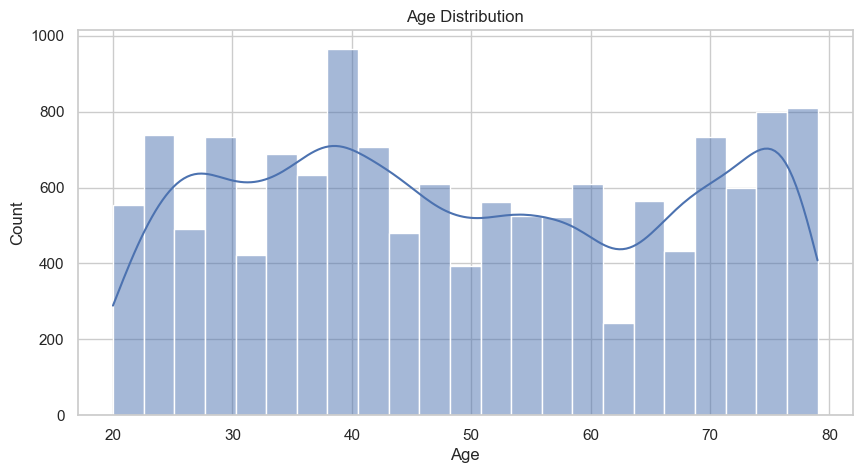

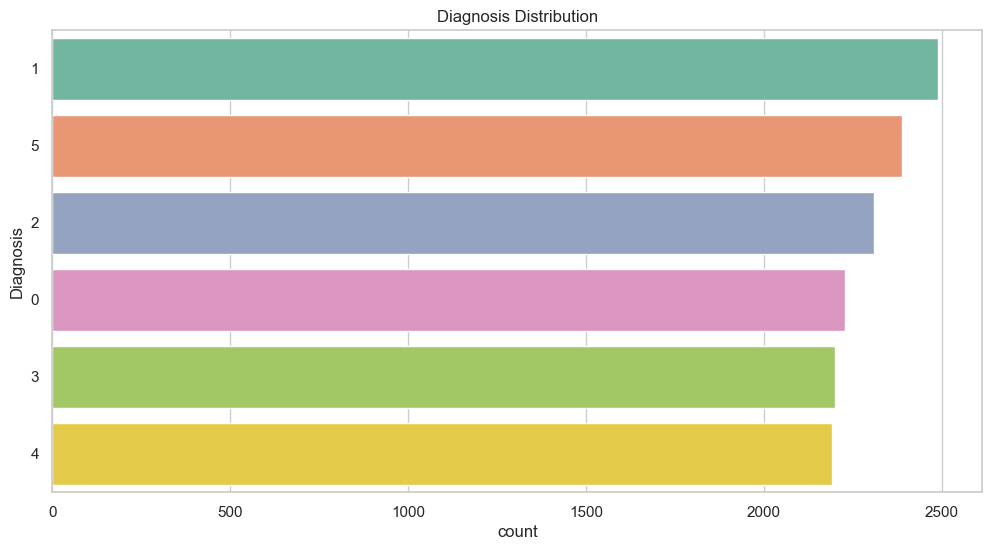

In [12]:
# Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_int['Age'], kde=True)
plt.title('Age Distribution')

# Diagnosis Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Diagnosis', data=df_int, palette='Set2', order=df_int['Diagnosis'].value_counts().index)
plt.title('Diagnosis Distribution')

Text(0.5, 1.0, 'Esbach vs MBL by Diagnosis')

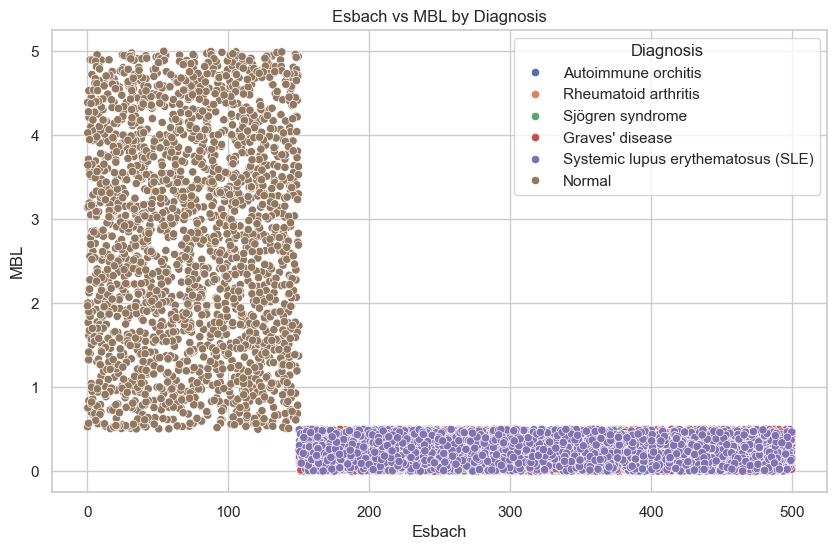

In [13]:
# Scatter plot of RBC_Count and Hemoglobin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Esbach', y='MBL', hue='Diagnosis', data=df)
plt.title('Esbach vs MBL by Diagnosis')

In [14]:
# MBL ve Esbach değerlerini içeren tabloyu oluşturma
mbl_esbach_data = df[['Esbach', 'MBL_Level', 'C3',"C4", 'Age',"ESR", "Diagnosis"]]

# Veriyi ekrana bastırma
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Selected Datas", dataframe=mbl_esbach_data)
mbl_esbach_data

Selected Datas


Esbach  MBL_Level          C3         C4  Age        ESR  \
0      154.915372       0.71   14.274072   8.281658   62  21.470329   
1      447.570310       1.58    2.083559   6.555046   54  31.601330   
2      236.292853       1.18   73.459310   6.957688   34  27.346259   
3      239.695961       0.95   67.439371   4.355488   22  23.728429   
4      466.374954       1.37   54.250929   7.824894   20  30.440890   
...           ...        ...         ...        ...  ...        ...   
13807  101.731314       1.09   91.273470  32.020403   30  19.254554   
13808   25.991969       1.75   91.277690  17.879366   78   3.528217   
13809   81.750752       1.22  177.640134  10.541387   33  12.557989   
13810  116.281738       0.65  120.180540  15.614936   37  12.323572   
13811   96.928630       0.52  133.130671  36.576699   73  12.567959   

                 Diagnosis  
0      Autoimmune orchitis  
1      Autoimmune orchitis  
2      Autoimmune orchitis  
3      Autoimmune orchitis  
4      Autoimmune orchitis  
...                    ...  
13807               Normal  
13808               Normal  
13809               Normal  
13810               Normal  
13811               Normal  

[13812 rows x 7 columns]

-Esbach ve MBL arasında belirgin bir negatif korelasyon var gibi görünüyor.</br>
- Normal bireylerin (kahverengi noktalar) büyük bir kısmı MBL seviyeleri yüksekken, Esbach seviyeleri düşük.</br>
- Autoimmune hastalıkları olan bireylerde (özellikle SLE ve Sjögren sendromu gibi) Esbach seviyesi yüksek ancak MBL seviyesi düşük görünüyor.</br>

-Esbach Seviyesi Yüksek Olan Hastalar (200-500 aralığı)</br>
- Bu bölgede, özellikle otoimmün hastalıklar (SLE, Graves, Sjögren, Romatoid Artrit) görülüyor.</br>
- Bu hastalıklarda böbrek hasarı ve proteinüri daha yaygın olabilir.</br>
- MBL seviyesi genellikle 0 civarında, yani bu bireylerde MBL eksikliği olabilir.</br>

-MBL Seviyesi Yüksek Olan Bireyler (1-5 aralığı)</br>
- Bu bölgede, Esbach seviyesi oldukça düşük (0-100 aralığında).</br>
- Bu bireyler büyük ölçüde "Normal" kategorisine ait görünüyor.</br>
- Bu durum, sağlıklı bireylerde böbrek fonksiyonlarının korunmuş olduğunu ve MBL seviyelerinin genellikle daha yüksek olabileceğini gösterebilir.</br>

**📌 Sonuç**</br>
✔ Normal bireylerde MBL yüksek ve Esbach düşük.</br>
✔ Otoimmün hastalıklarda MBL seviyesi genellikle düşük, ancak Esbach yüksek olabilir.</br>
✔ Bu durum, otoimmün hastalıkların böbrek fonksiyonlarını etkileyebileceğini ve MBL eksikliğinin böbrek hasarıyla bağlantılı olabileceğini düşündürebilir

In [15]:
# Gerekli kütüphaneleri yeniden yükleyelim
import scipy.stats as stats

# MBL ve Esbach sütunlarını seçelim
mbl_esbach_data = df_int[['MBL', 'Esbach']].dropna()  # Eksik değerleri temizleyelim

# Pearson korelasyon katsayısını hesaplayalım
pearson_corr, p_value = stats.pearsonr(mbl_esbach_data['MBL'], mbl_esbach_data['Esbach'])

# Sonuçları ekrana yazdıralım
print("Pearson korelasyon katsayısı(r):",pearson_corr),
print("p-değeri:",p_value)

Pearson korelasyon katsayısı(r): -0.60718568490456
p-değeri: 0.0


**Pearson Korelasyon Katsayısı (r = -0.607)**

Korelasyon katsayısı -1 ile +1 arasında değişir:
r > 0 → Pozitif korelasyon (biri artınca diğeri de artar)
r < 0 → Negatif korelasyon (biri artarken diğeri azalır)
r = 0 → İlişki yok
-0.607 değeri, orta-şiddetli negatif bir korelasyon olduğunu gösterir.
MBL arttıkça Esbach değeri azalmaya eğilimlidir.
MBL düştükçe Esbach değeri artar, yani böbrek fonksiyonları daha fazla bozuluyor olabilir.

**p-değeri (p = 0.0)**
p-değeri istatistiksel anlamlılık için kullanılır.
Genellikle p < 0.05 ise sonuç anlamlı kabul edilir.
Bu durumda p ≈ 0, yani ilişki oldukça güçlü ve anlamlı.
Yani MBL ile Esbach arasındaki negatif ilişki tesadüfen oluşmamış, istatistiksel olarak geçerli.

**Biyolojik ve Klinik Anlam**
MBL eksikliği, böbrek fonksiyon bozukluğu ve proteinüri (idrarda fazla protein kaçağı) ile bağlantılı olabilir.
Düşük MBL seviyeleri → Yüksek Esbach seviyeleri (Böbrek fonksiyonları daha fazla bozuluyor olabilir).
Bu ilişki, otoimmün hastalıklarda bağışıklık sistemi ile böbrek fonksiyonlarının nasıl etkilendiğini gösterebilir.

In [16]:
# Öncelikle hastalık gruplarını belirleyelim
disease_groups = df_int['Diagnosis'].unique()

# Sonuçları saklamak için bir sözlük oluştur
correlation_results = {"Diagnosis": [], "Pearson Correlation": [], "p-value": []}

# Her hastalık için MBL ve Esbach arasındaki korelasyonu hesapla
for disease in disease_groups:
    subset = df_int[df_int['Diagnosis'] == disease][['MBL', 'Esbach']].dropna()  # Eksik verileri kaldır
    
    # Eğer yeterli veri varsa (en az 2 değer içermeli)
    if len(subset) > 1:
        pearson_corr, p_value = stats.pearsonr(subset['MBL'], subset['Esbach'])
        correlation_results["Diagnosis"].append(disease)
        correlation_results["Pearson Correlation"].append(pearson_corr)
        correlation_results["p-value"].append(p_value)

# Sonuçları DataFrame'e çevir
correlation_df = pd.DataFrame(correlation_results)

# Sonuçları ekrana göster
import ace_tools_open as tools
tools.display_dataframe_to_user(name="MBL and Esbach Correlation by Disease", dataframe=correlation_df)

MBL and Esbach Correlation by Disease


In [17]:
df_int.dtypes

Patient_ID                    int64
Age                           int64
Gender                        int64
Diagnosis                     int64
Sickness_Duration_Months      int64
                             ...   
Anti_Mi2                      int64
Anti_parietal_cell            int64
Progesterone_antibodies       int64
Anti_Sm                       int64
MBL                         float64
Length: 80, dtype: object

In [18]:
selected_columns = ["Esbach", "MBL","Diagnosis"]
df_esbach_mbl = df_int[selected_columns].copy()
df_esbach_mbl

Esbach       MBL  Diagnosis
0      154.915372  0.051675          1
1      447.570310  0.065344          1
2      236.292853  0.126083          1
3      239.695961  0.251571          1
4      466.374954  0.459332          1
...           ...       ...        ...
13807  101.731314  4.458054          0
13808   25.991969  2.398731          0
13809   81.750752  4.287405          0
13810  116.281738  3.385175          0
13811   96.928630  4.477346          0

[13812 rows x 3 columns]

In [19]:
exclude_columns = ['Patient_ID']  # Örnek olarak bu sütunları hariç tutuyoruz

# Hariç tutulan sütunlar dışında kalanları seçme
df_selected = df_int.drop(columns=exclude_columns, errors='ignore')

print(df_selected.quantile([0.00,0.05,0.5,0.95,0.99,1]).T)

                               0.00       0.05       0.50        0.95  \
Age                       20.000000  23.000000  48.000000   77.000000   
Gender                     0.000000   0.000000   0.000000    1.000000   
Diagnosis                  0.000000   0.000000   2.000000    5.000000   
Sickness_Duration_Months   1.000000   7.000000  62.000000  112.000000   
RBC_Count                  3.510000   3.590000   4.400000    5.376144   
...                             ...        ...        ...         ...   
Anti_Mi2                   0.000000   0.000000   0.000000    0.000000   
Anti_parietal_cell         0.000000   0.000000   0.000000    0.000000   
Progesterone_antibodies    0.000000   0.000000   0.000000    0.000000   
Anti_Sm                    0.000000   0.000000   0.000000    0.000000   
MBL                        0.000007   0.029153   0.296318    3.561894   

                                0.99        1.00  
Age                        78.000000   79.000000  
Gender               

In [20]:
print(df_esbach_mbl.quantile([0.00,0.05,0.5,0.95,0.99,1]).T)

               0.00       0.05        0.50        0.95        0.99        1.00
Esbach     0.002484  41.288816  290.962427  480.383686  496.178864  499.999463
MBL        0.000007   0.029153    0.296318    3.561894    4.709999    4.999038
Diagnosis  0.000000   0.000000    2.000000    5.000000    5.000000    5.000000


Esbach ve MBL farklı dağılım gösteriyor:</br>

- Esbach değerleri böbrek hasarı olan hastalarda çok yüksek görünüyor.</br>
- MBL değerleri otoimmün hastalıklarla ilişkili olabilir ve bazı hastalarda çok düşükken, bazılarında yüksek.</br>

Her iki değişken de sağa çarpık dağılıma sahip, yani birkaç hasta aşırı uç değerlere sahip olabilir.

count    13812.000000
mean      4943.404431
std       2973.417945
min          6.000000
5%         398.000000
10%        770.000000
20%       1862.000000
30%       2757.000000
40%       3793.000000
50%       5192.000000
60%       6011.000000
70%       6950.000000
80%       8049.000000
90%       9034.000000
95%       9396.000000
99%       9980.000000
max       9999.000000
Name: Patient_ID, dtype: float64


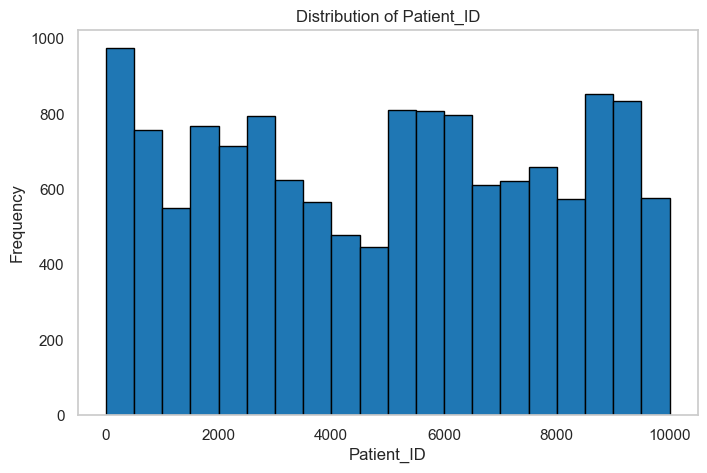

count    13812.000000
mean        49.507023
std         17.659349
min         20.000000
5%          23.000000
10%         26.000000
20%         32.000000
30%         37.000000
40%         43.000000
50%         48.000000
60%         55.000000
70%         62.000000
80%         69.000000
90%         75.000000
95%         77.000000
99%         78.000000
max         79.000000
Name: Age, dtype: float64


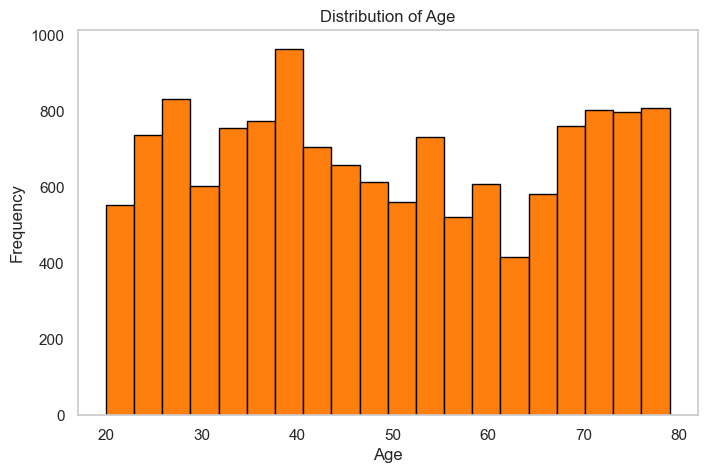

count    13812.000000
mean         0.480669
std          0.499644
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Gender, dtype: float64


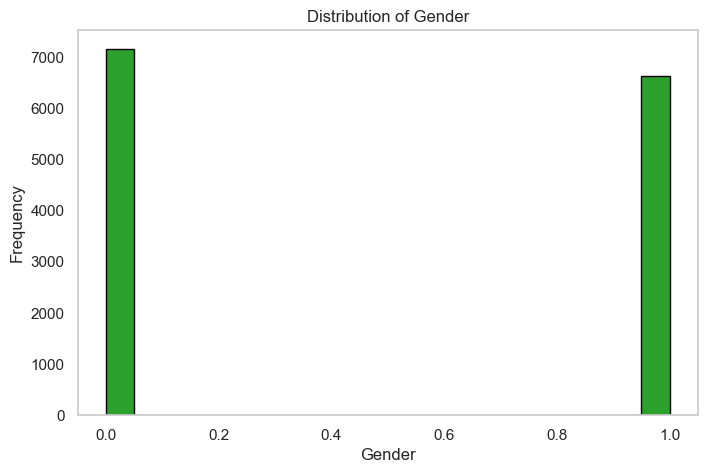

count    13812.000000
mean         2.492615
std          1.713204
min          0.000000
5%           0.000000
10%          0.000000
20%          1.000000
30%          1.000000
40%          2.000000
50%          2.000000
60%          3.000000
70%          4.000000
80%          4.000000
90%          5.000000
95%          5.000000
99%          5.000000
max          5.000000
Name: Diagnosis, dtype: float64


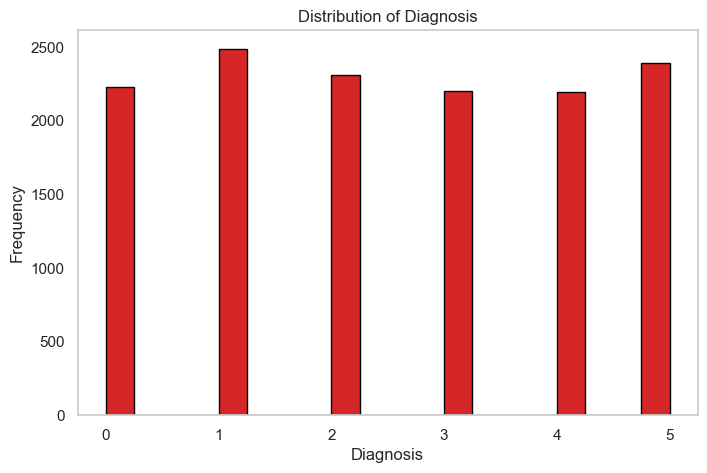

count    13812.000000
mean        62.589125
std         33.604675
min          1.000000
5%           7.000000
10%         18.000000
20%         29.000000
30%         40.000000
40%         51.000000
50%         62.000000
60%         77.000000
70%         87.000000
80%         97.000000
90%        109.000000
95%        112.000000
99%        117.000000
max        119.000000
Name: Sickness_Duration_Months, dtype: float64


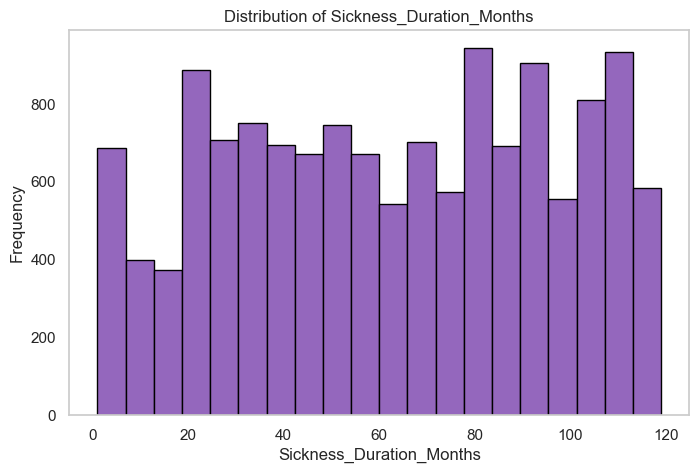

count    13812.000000
mean         4.413987
std          0.555170
min          3.510000
5%           3.590000
10%          3.680000
20%          3.850000
30%          4.060000
40%          4.270000
50%          4.400000
60%          4.570000
70%          4.730000
80%          4.860000
90%          4.990000
95%          5.376144
99%          5.952062
max          6.099889
Name: RBC_Count, dtype: float64


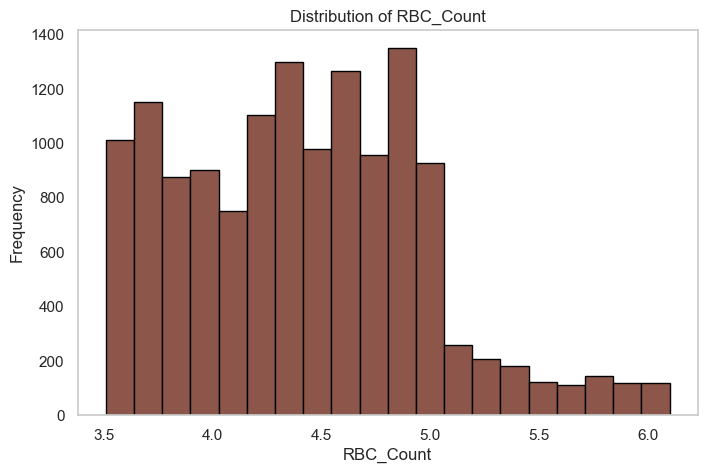

count    13812.000000
mean        12.855142
std          1.650173
min         10.000000
5%          10.330000
10%         10.560000
20%         11.140000
30%         11.790000
40%         12.280000
50%         12.920000
60%         13.436229
70%         13.980000
80%         14.399128
90%         14.829874
95%         15.333042
99%         16.810958
max         17.195634
Name: Hemoglobin, dtype: float64


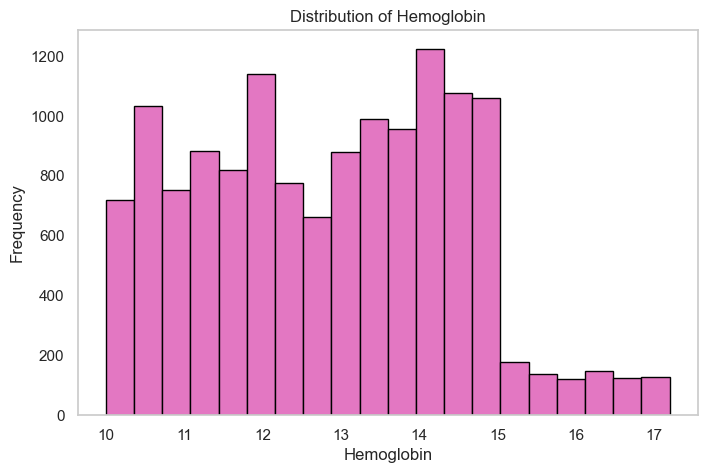

count    13812.000000
mean        41.071055
std          2.941540
min         36.000000
5%          36.610000
10%         37.140000
20%         38.170000
30%         39.180000
40%         40.160000
50%         41.027491
60%         41.930000
70%         42.750000
80%         43.662962
90%         44.540000
95%         45.259321
99%         49.286544
max         50.282139
Name: Hematocrit, dtype: float64


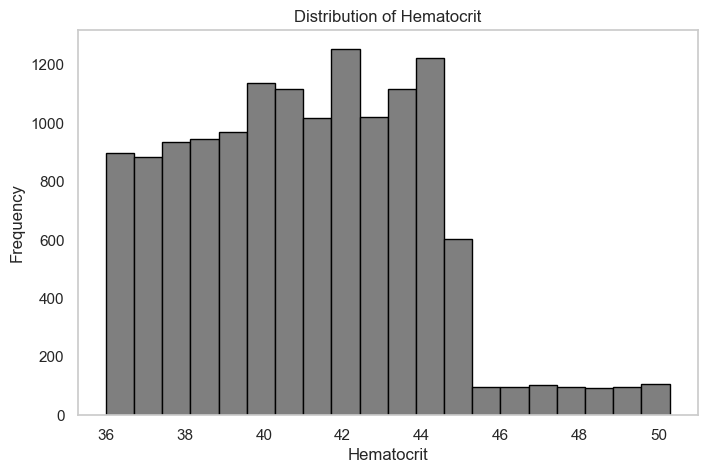

count    13812.000000
mean        89.791482
std          8.077185
min         75.090000
5%          77.370000
10%         79.130000
20%         81.540000
30%         84.110000
40%         86.700000
50%         89.455557
60%         92.472678
70%         95.380000
80%         97.880000
90%        100.900000
95%        102.760000
99%        104.330000
max        104.970000
Name: MCV, dtype: float64


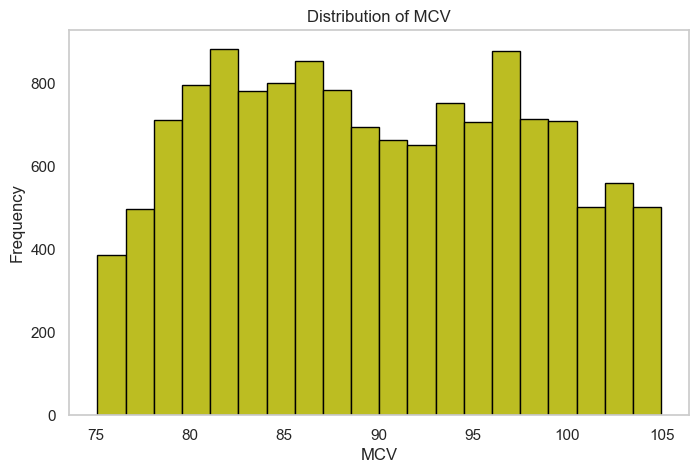

count    13812.000000
mean        29.218271
std          1.673751
min         26.000000
5%          26.410000
10%         26.760000
20%         27.570000
30%         28.187378
40%         28.770000
50%         29.270000
60%         29.800000
70%         30.360000
80%         30.940000
90%         31.490000
95%         31.790000
99%         31.920000
max         32.000000
Name: MCH, dtype: float64


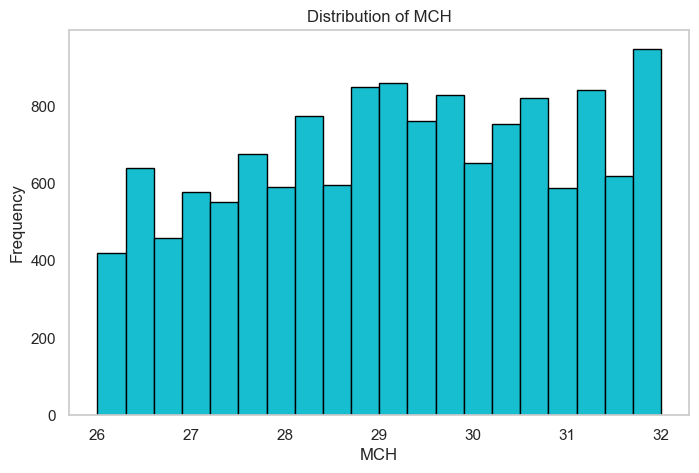

count    13812.000000
mean        33.479772
std          1.407444
min         31.000000
5%          31.250000
10%         31.500000
20%         32.050000
30%         32.540000
40%         32.990000
50%         33.510000
60%         33.940000
70%         34.479235
80%         34.910000
90%         35.409974
95%         35.670000
99%         35.961137
max         35.999406
Name: MCHC, dtype: float64


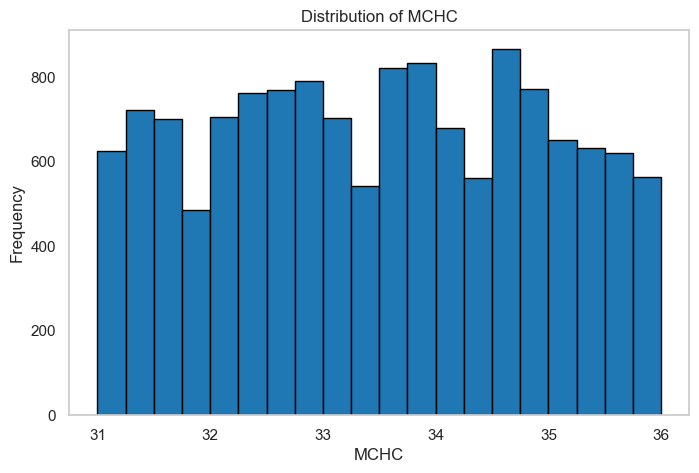

count    13812.000000
mean        13.877249
std          1.197298
min         11.500689
5%          12.080000
10%         12.250000
20%         12.666877
30%         13.090000
40%         13.440000
50%         13.810000
60%         14.230000
70%         14.640000
80%         15.170000
90%         15.560000
95%         15.830000
99%         15.940000
max         16.000000
Name: RDW, dtype: float64


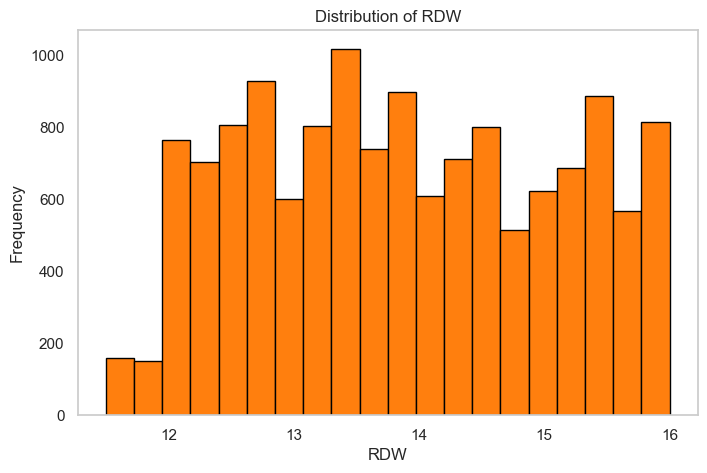

count    13812.000000
mean         1.827783
std          0.632107
min          0.500171
5%           0.860000
10%          0.980000
20%          1.180000
30%          1.403679
40%          1.630000
50%          1.795498
60%          2.010000
70%          2.243698
80%          2.470000
90%          2.730000
95%          2.840000
99%          2.980000
max          3.000000
Name: Reticulocyte_Count, dtype: float64


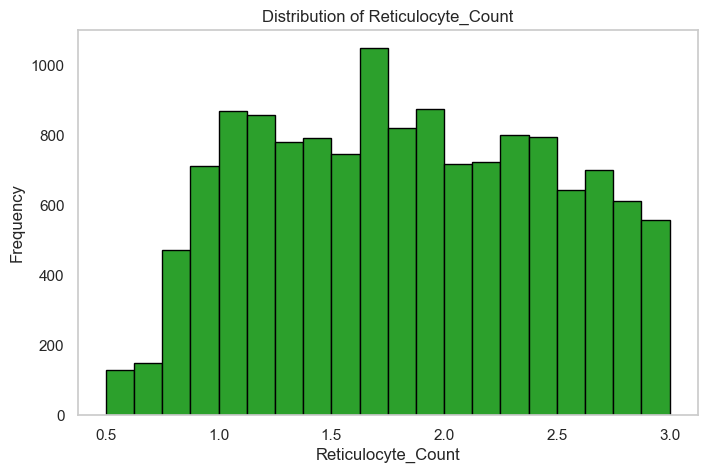

count    13812.000000
mean      7953.156486
std       2295.521535
min       4004.000000
5%        4417.000000
10%       4799.162127
20%       5588.000000
30%       6411.943594
40%       7067.247612
50%       7949.000000
60%       8720.092789
70%       9497.000000
80%      10394.000000
90%      11103.000000
95%      11600.000000
99%      11972.000000
max      11992.000000
Name: WBC_Count, dtype: float64


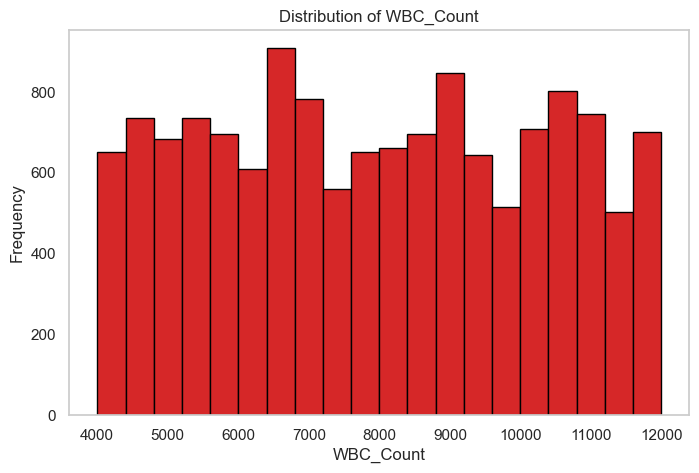

count    13812.000000
mean        52.188225
std         12.000338
min         30.070000
5%          32.560000
10%         36.060000
20%         40.820000
30%         44.321232
40%         47.616282
50%         51.675056
60%         55.823717
70%         59.830426
80%         64.230000
90%         68.880000
95%         72.596000
99%         74.730000
max         75.000000
Name: Neutrophils, dtype: float64


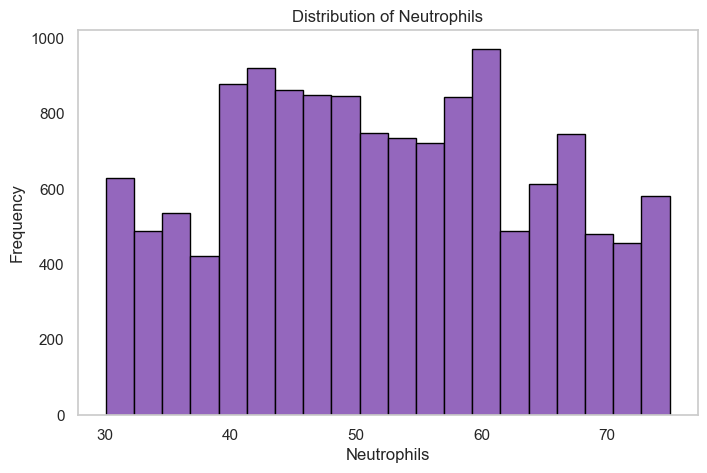

count    13812.000000
mean        29.813040
std          8.337119
min         15.260000
5%          17.000000
10%         18.350000
20%         21.220000
30%         23.820000
40%         26.757430
50%         29.670000
60%         32.620000
70%         35.570000
80%         38.640000
90%         40.877000
95%         42.900000
99%         44.270000
max         44.970000
Name: Lymphocytes, dtype: float64


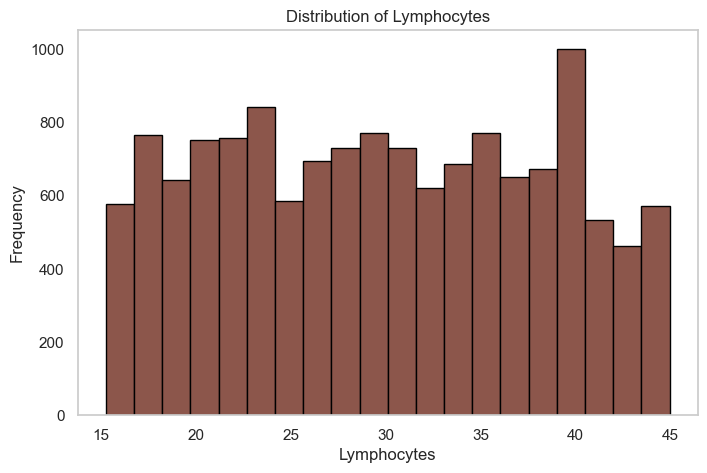

count    13812.000000
mean         5.845260
std          2.224147
min          2.001484
5%           2.400000
10%          2.690000
20%          3.517572
30%          4.370000
40%          5.070000
50%          5.874472
60%          6.620000
70%          7.270000
80%          7.953004
90%          8.930000
95%          9.430000
99%          9.910000
max          9.980000
Name: Monocytes, dtype: float64


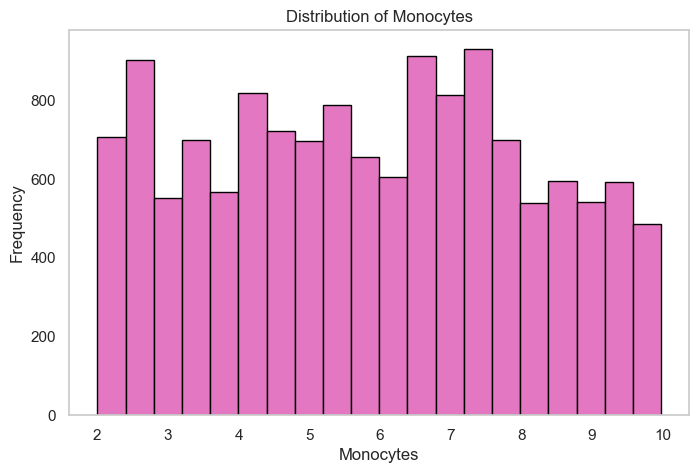

count    13812.000000
mean         2.910043
std          1.106761
min          1.000943
5%           1.246246
10%          1.410000
20%          1.720000
30%          2.150000
40%          2.580000
50%          2.910000
60%          3.270000
70%          3.620000
80%          3.940000
90%          4.470000
95%          4.790000
99%          4.960000
max          4.990000
Name: Eosinophils, dtype: float64


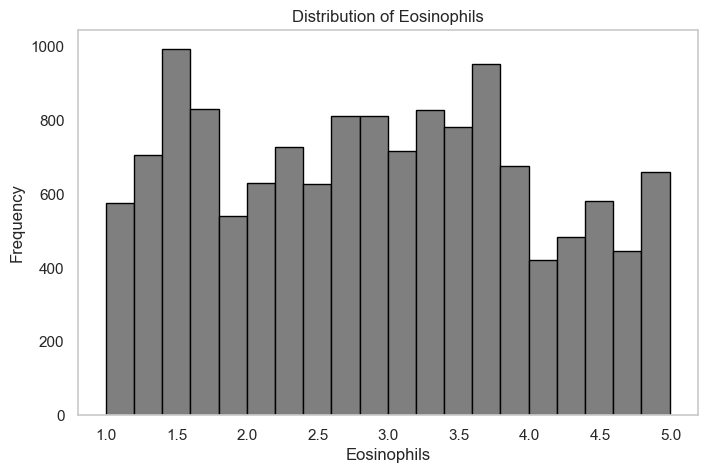

count    13812.000000
mean         0.945997
std          0.278462
min          0.500000
5%           0.542827
10%          0.584925
20%          0.670000
30%          0.760000
40%          0.830000
50%          0.910000
60%          1.000000
70%          1.100000
80%          1.230000
90%          1.360000
95%          1.430000
99%          1.490000
max          1.490000
Name: Basophils, dtype: float64


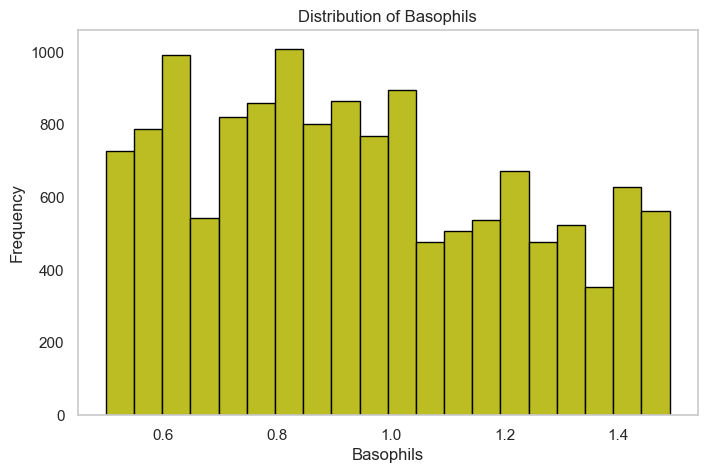

count     13812.000000
mean     294699.395248
std      113312.573900
min      100073.000000
5%       116710.000000
10%      137908.000000
20%      176078.000000
30%      217602.000000
40%      254599.000000
50%      293817.197696
60%      333753.259745
70%      372977.075181
80%      412946.127758
90%      446979.000000
95%      473259.000000
99%      492996.000000
max      499918.000000
Name: PLT_Count, dtype: float64


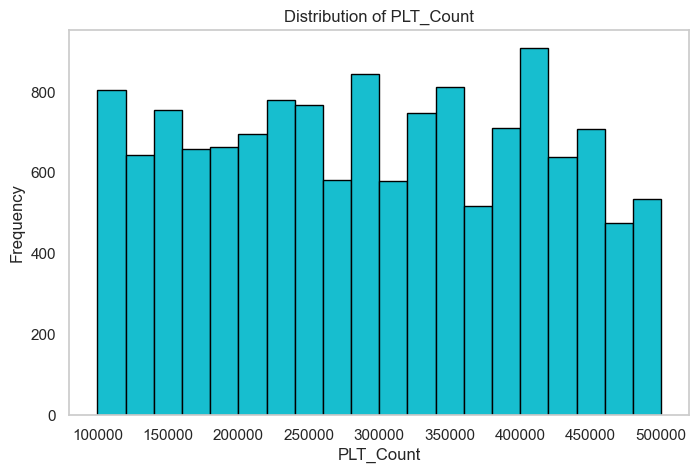

count    13812.000000
mean         9.461018
std          1.324777
min          7.010000
5%           7.360000
10%          7.640000
20%          8.180000
30%          8.600000
40%          8.959825
50%          9.510000
60%          9.860000
70%         10.310000
80%         10.808555
90%         11.340000
95%         11.570000
99%         11.830000
max         11.980000
Name: MPV, dtype: float64


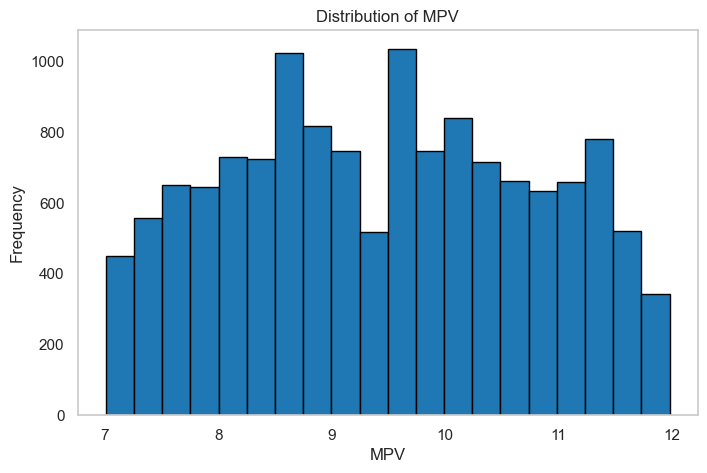

count    13812.000000
mean         0.597524
std          0.490415
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: ANA, dtype: float64


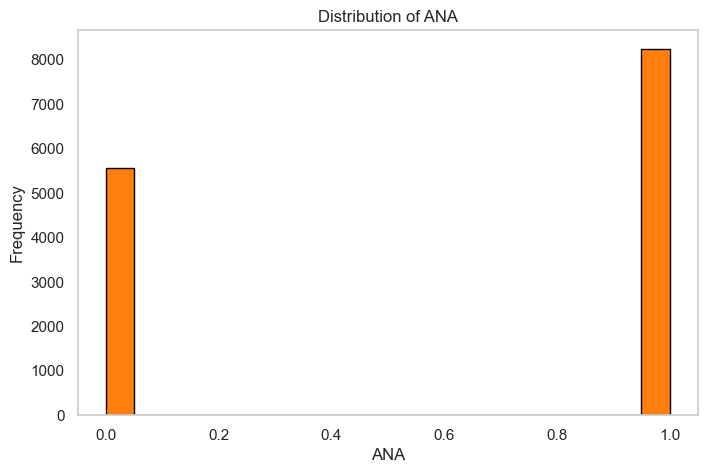

count    13812.000000
mean       284.303766
std        132.082393
min          0.002484
5%          41.288816
10%         91.827249
20%        167.576386
30%        209.093575
40%        248.512931
50%        290.962427
60%        332.499312
70%        374.771407
80%        416.114043
90%        458.806199
95%        480.383686
99%        496.178864
max        499.999463
Name: Esbach, dtype: float64


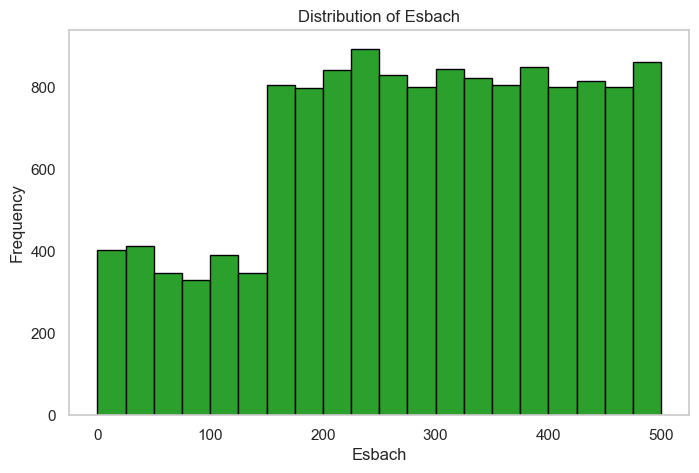

count    13812.000000
mean         1.278167
std          0.439055
min          0.500000
5%           0.570000
10%          0.680000
20%          0.830000
30%          0.970000
40%          1.120000
50%          1.280000
60%          1.430000
70%          1.600000
80%          1.730000
90%          1.880000
95%          1.950000
99%          2.000000
max          2.000000
Name: MBL_Level, dtype: float64


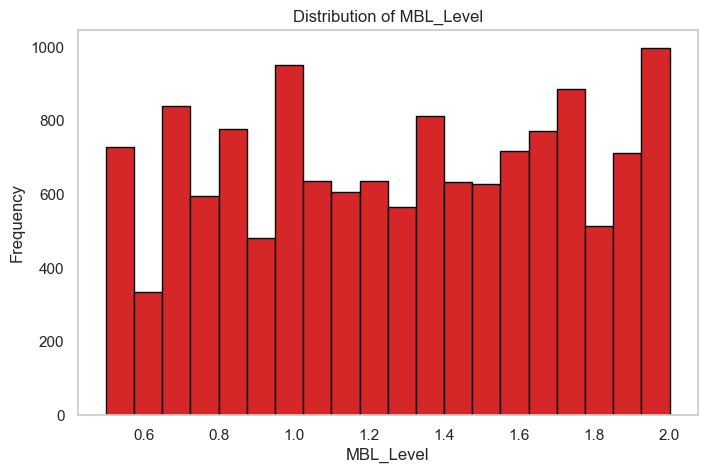

count    13812.000000
mean        32.750785
std         14.426240
min          0.016384
5%           5.172760
10%         10.281520
20%         21.590453
30%         25.592064
40%         29.713258
50%         33.881456
60%         37.946944
70%         41.911027
80%         45.995245
90%         50.075115
95%         54.696693
99%         58.927269
max         59.983368
Name: ESR, dtype: float64


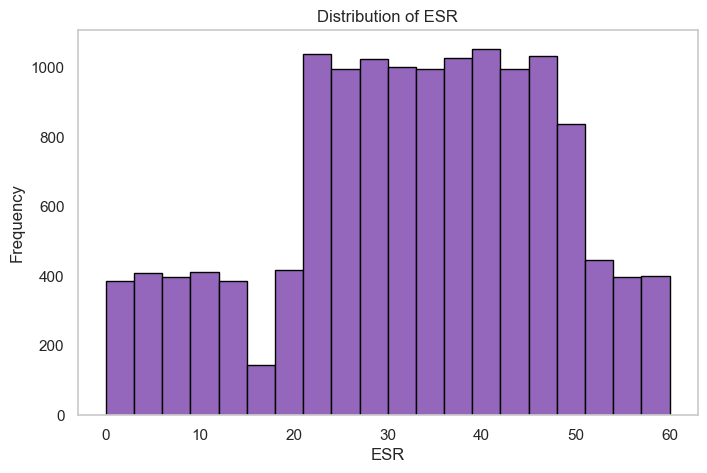

count    13812.000000
mean        59.407066
std         42.302635
min          0.025143
5%           5.642292
10%         10.932594
20%         21.265169
30%         31.894993
40%         42.541908
50%         52.912616
60%         63.888474
70%         74.962461
80%         85.760462
90%        125.446471
95%        153.138254
99%        174.792591
max        179.995773
Name: C3, dtype: float64


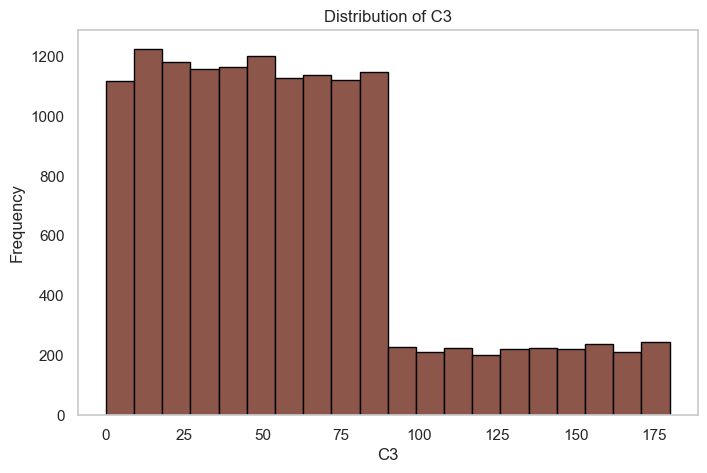

count    13812.000000
mean         8.295237
std          8.622329
min          0.001624
5%           0.582178
10%          1.157023
20%          2.398440
30%          3.616859
40%          4.833919
50%          6.058660
60%          7.268501
70%          8.386780
80%          9.562351
90%         21.747621
95%         30.927273
99%         38.068088
max         39.997273
Name: C4, dtype: float64


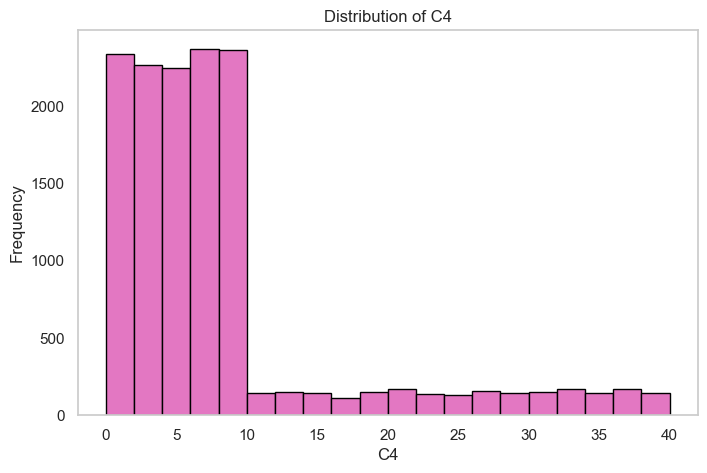

count    13812.000000
mean        25.261236
std         15.175652
min          0.000881
5%           0.302242
10%          0.612281
20%         11.767510
30%         16.593922
40%         21.502377
50%         26.273553
60%         31.001363
70%         35.849591
80%         40.536618
90%         45.176066
95%         47.566210
99%         49.502776
max         49.986338
Name: CRP, dtype: float64


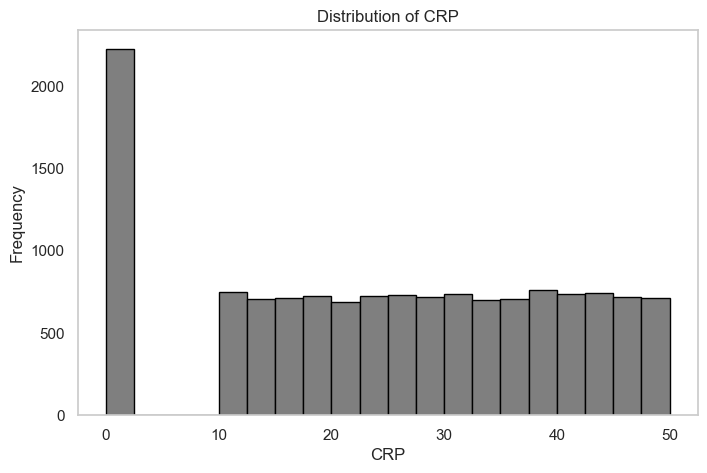

count    13812.000000
mean         0.488633
std          0.499889
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Anti-dsDNA, dtype: float64


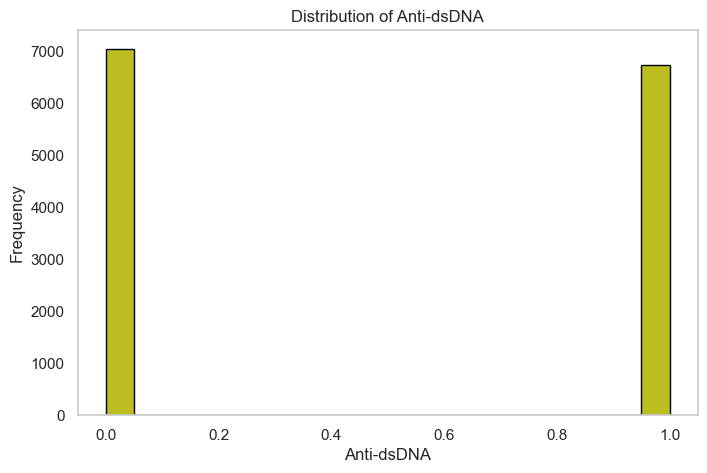

count    13812.000000
mean         0.524978
std          0.499394
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Anti-Sm, dtype: float64


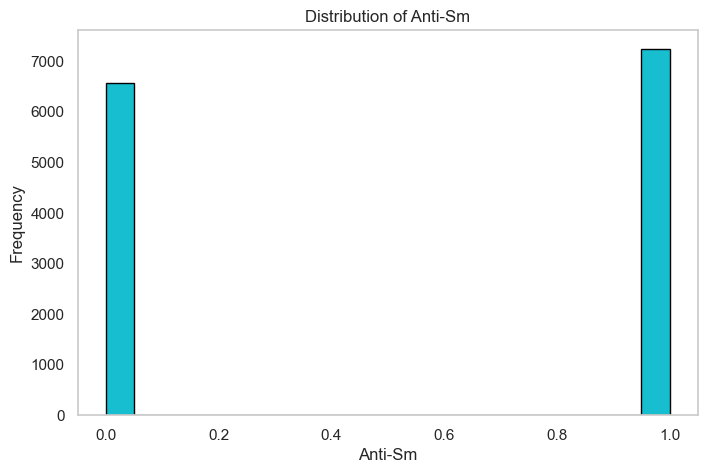

count    13812.000000
mean         0.548364
std          0.497673
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Rheumatoid factor, dtype: float64


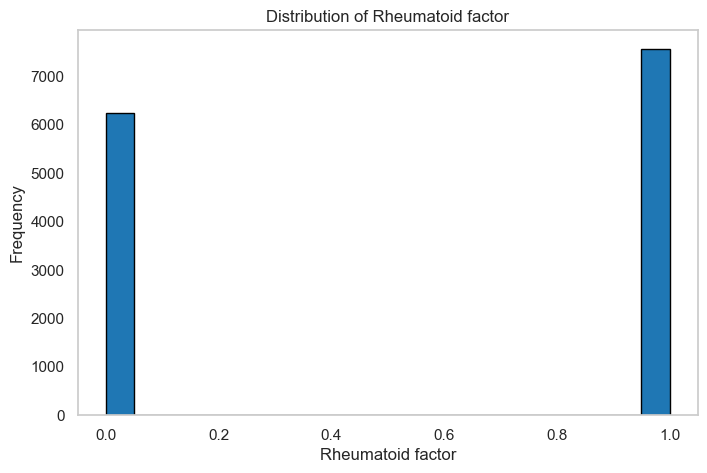

count    13812.000000
mean         0.459094
std          0.498342
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: ACPA, dtype: float64


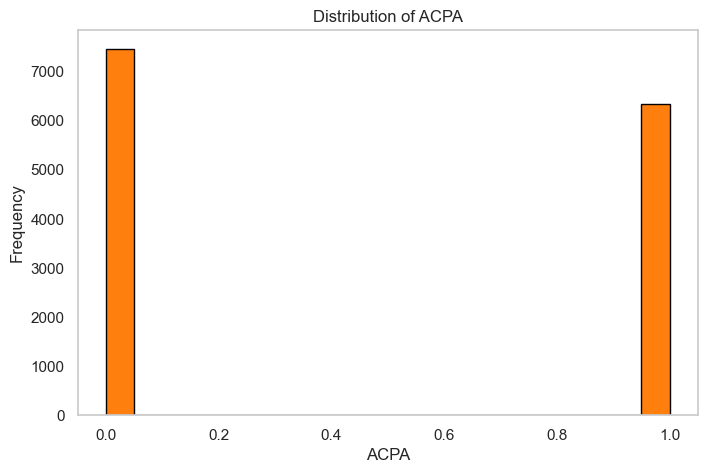

count    13812.000000
mean         0.419635
std          0.493517
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Anti-TPO, dtype: float64


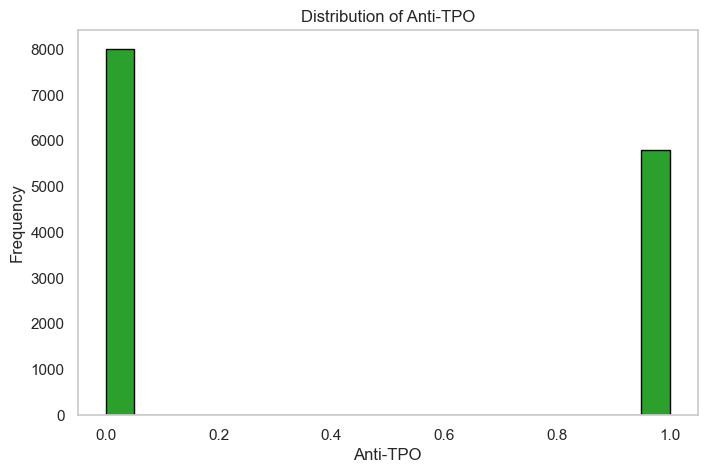

count    13812.000000
mean         0.463510
std          0.498685
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Anti-Tg, dtype: float64


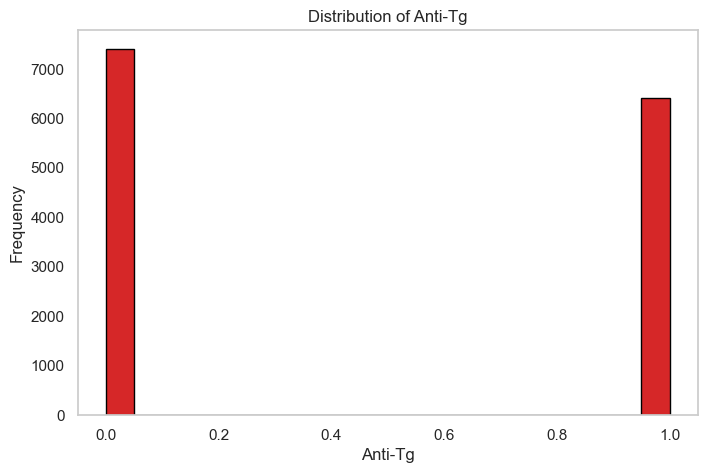

count    13812.000000
mean         0.501665
std          0.500015
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Anti-SMA, dtype: float64


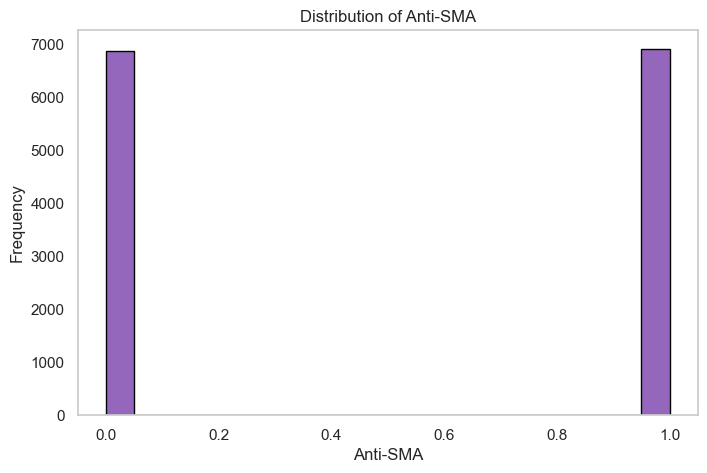

count    13812.000000
mean         0.516652
std          0.499741
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Low-grade fever, dtype: float64


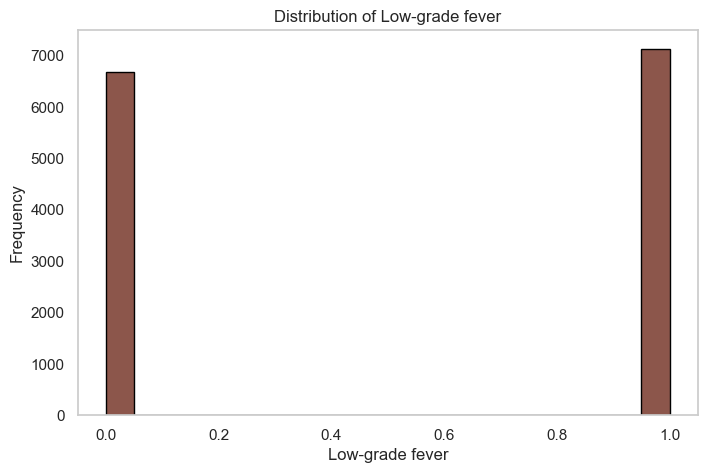

count    13812.000000
mean         0.509195
std          0.499934
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Fatigue or chronic tiredness, dtype: float64


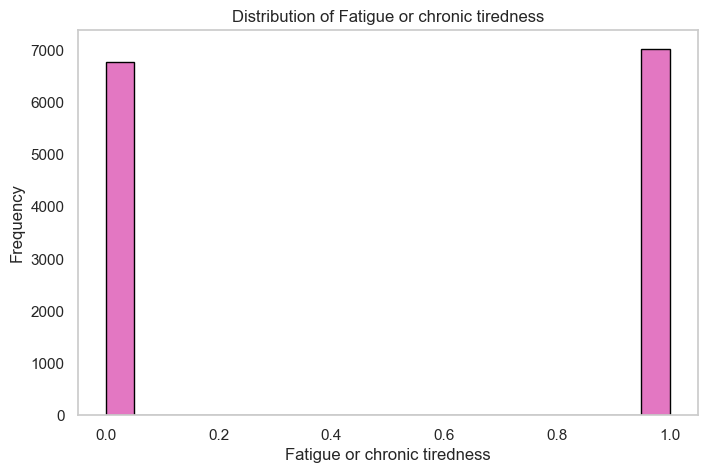

count    13812.000000
mean         0.584347
std          0.492852
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Dizziness, dtype: float64


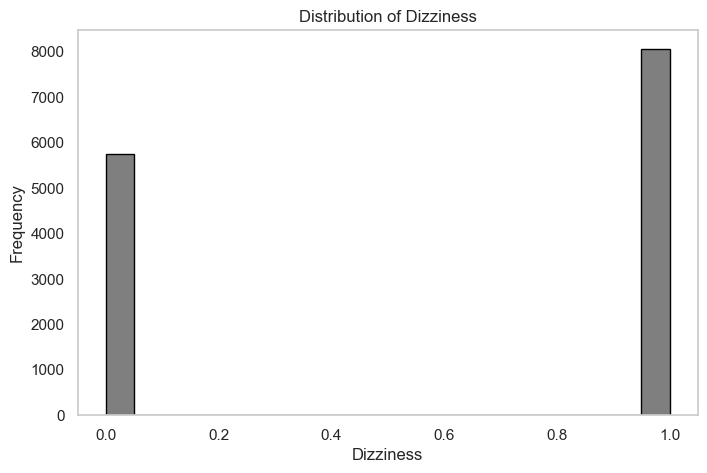

count    13812.000000
mean         0.519765
std          0.499627
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Weight loss, dtype: float64


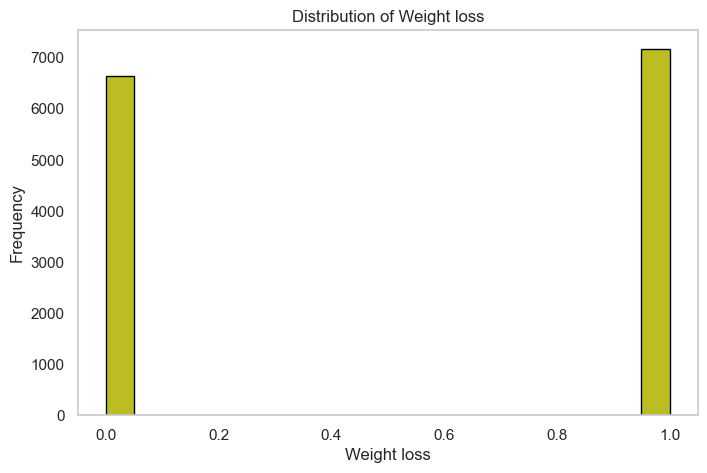

count    13812.000000
mean         0.518317
std          0.499682
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Rashes and skin lesions, dtype: float64


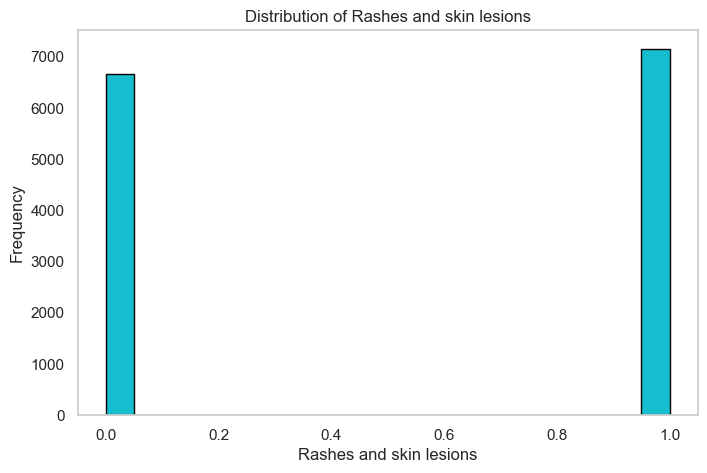

count    13812.000000
mean         0.524906
std          0.499397
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Stiffness in the joints, dtype: float64


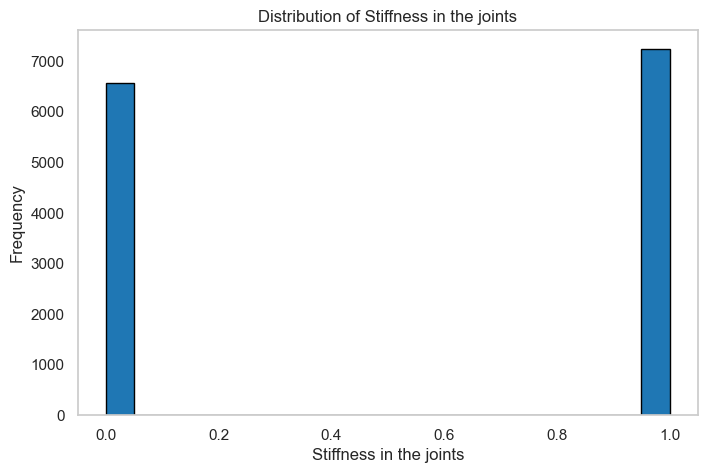

count    13812.000000
mean         0.513539
std          0.499835
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          1.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Brittle hair or hair loss, dtype: float64


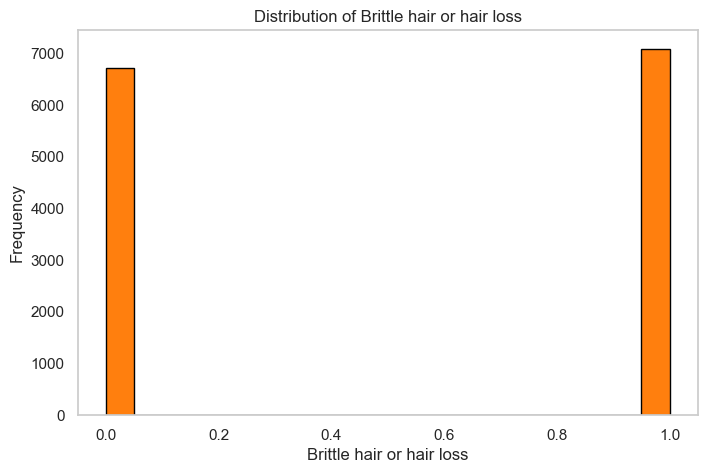

count    13812.000000
mean         0.469736
std          0.499101
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Dry eyes and mouth, dtype: float64


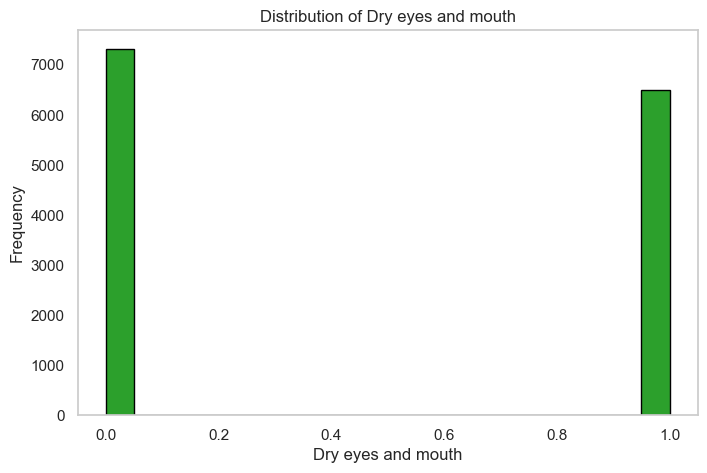

count    13812.000000
mean         0.482334
std          0.499706
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: General 'unwell' feeling, dtype: float64


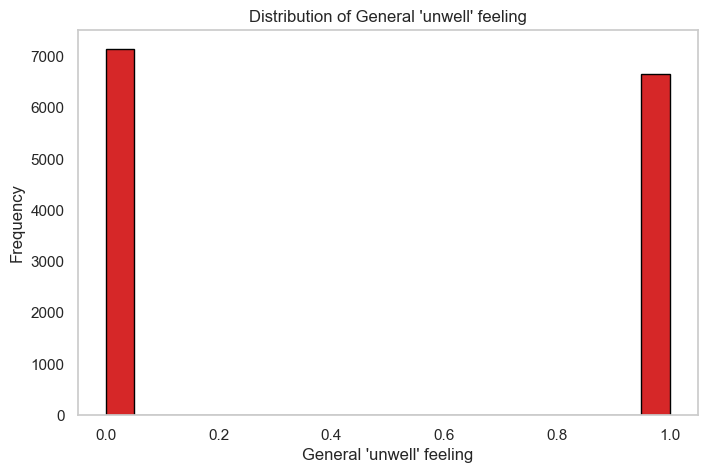

count    13812.000000
mean         0.477049
std          0.499491
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          1.000000
70%          1.000000
80%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: Joint pain, dtype: float64


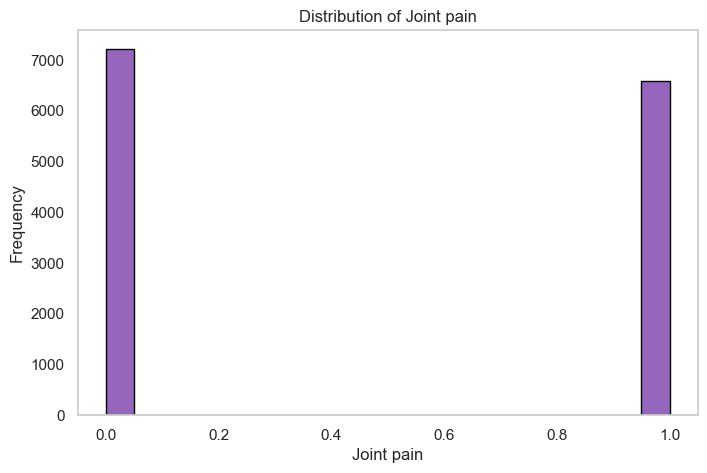

count    13812.000000
mean         0.002968
std          0.054404
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_dsDNA, dtype: float64


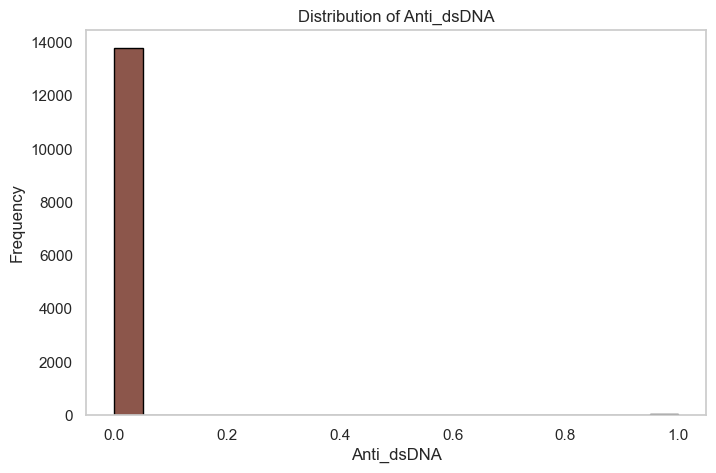

count    13812.000000
mean         0.001448
std          0.038027
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_enterocyte_antibodies, dtype: float64


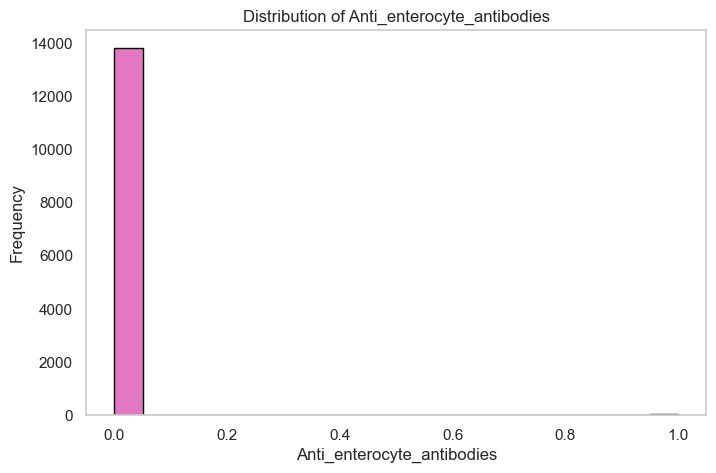

count    13812.000000
mean         0.006154
std          0.078209
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: anti_LKM1, dtype: float64


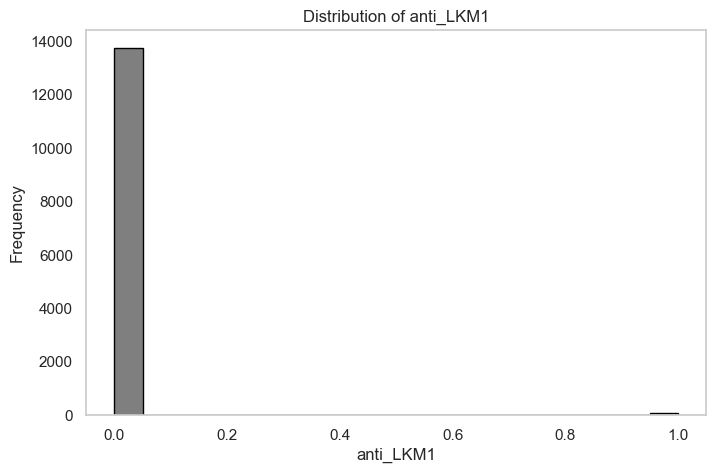

count    13812.000000
mean         0.000941
std          0.030666
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_RNP, dtype: float64


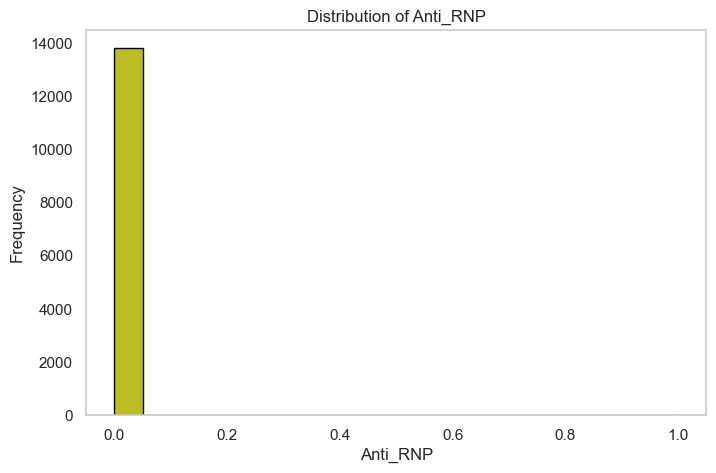

count    13812.000000
mean         0.008109
std          0.089687
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: ASCA, dtype: float64


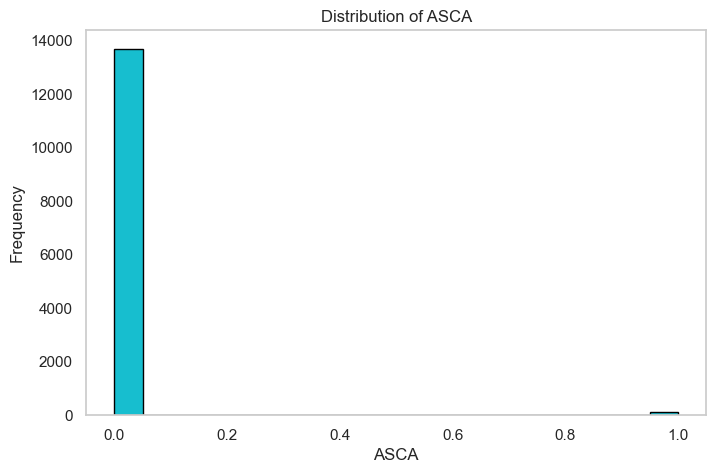

count    13812.000000
mean         0.000941
std          0.030666
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_Ro_SSA, dtype: float64


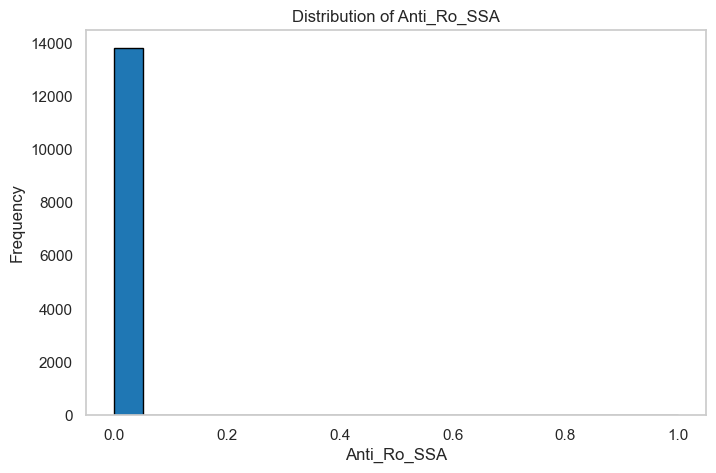

count    13812.000000
mean         0.007385
std          0.085621
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_CBir1, dtype: float64


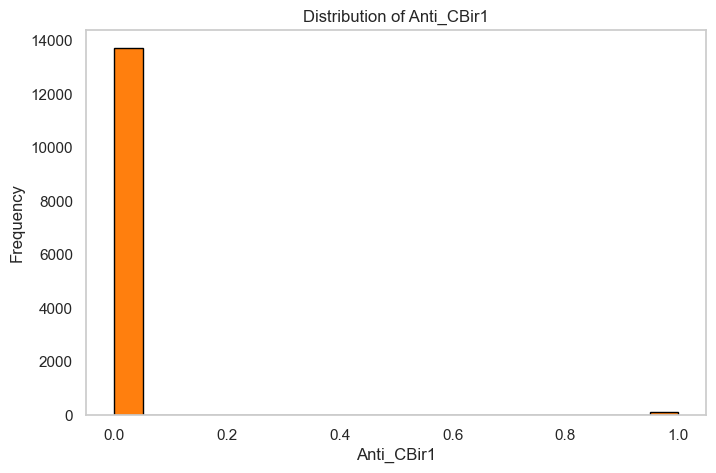

count    13812.000000
mean         0.020924
std          0.143135
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          1.000000
max          1.000000
Name: Anti_BP230, dtype: float64


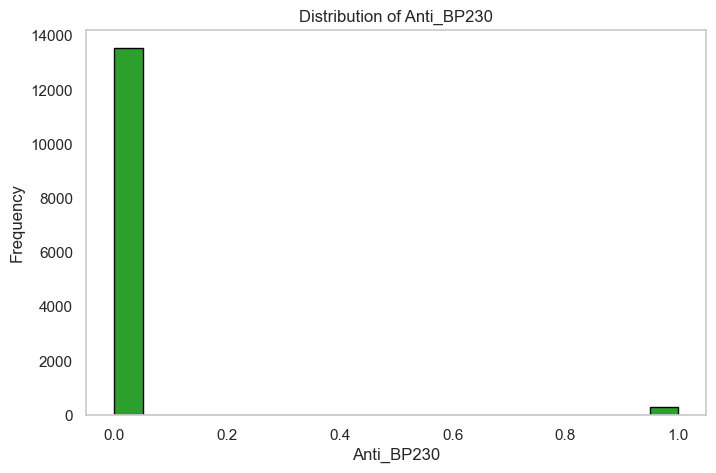

count    13812.0
mean         0.0
std          0.0
min          0.0
5%           0.0
10%          0.0
20%          0.0
30%          0.0
40%          0.0
50%          0.0
60%          0.0
70%          0.0
80%          0.0
90%          0.0
95%          0.0
99%          0.0
max          0.0
Name: Anti_tTG, dtype: float64


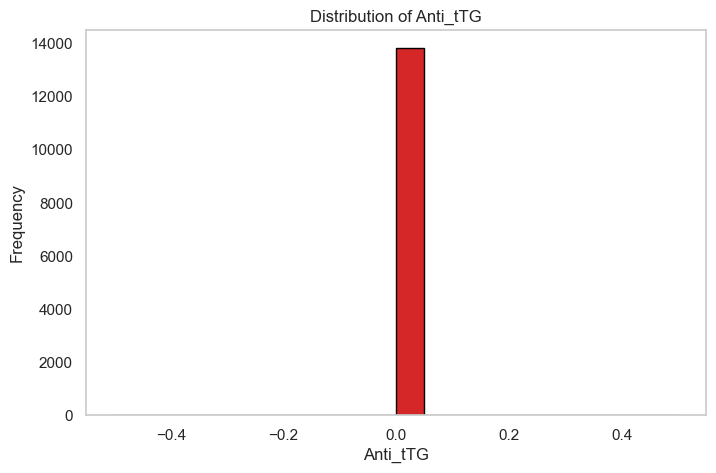

count    13812.000000
mean         0.001086
std          0.032938
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: DGP, dtype: float64


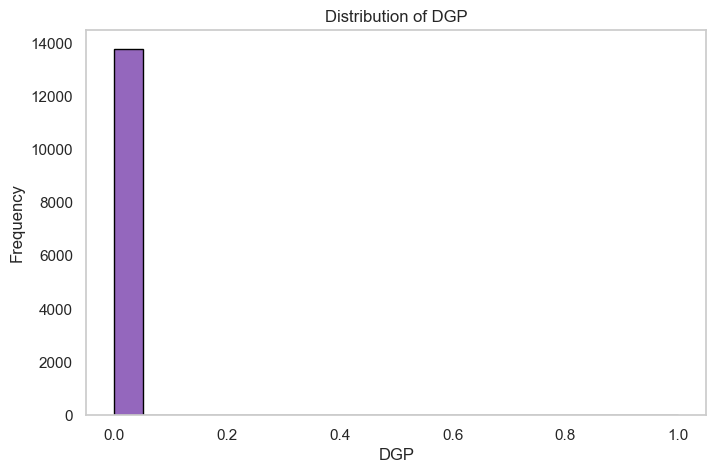

count    13812.000000
mean         0.020924
std          0.143135
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          1.000000
max          1.000000
Name: Anti_BP180, dtype: float64


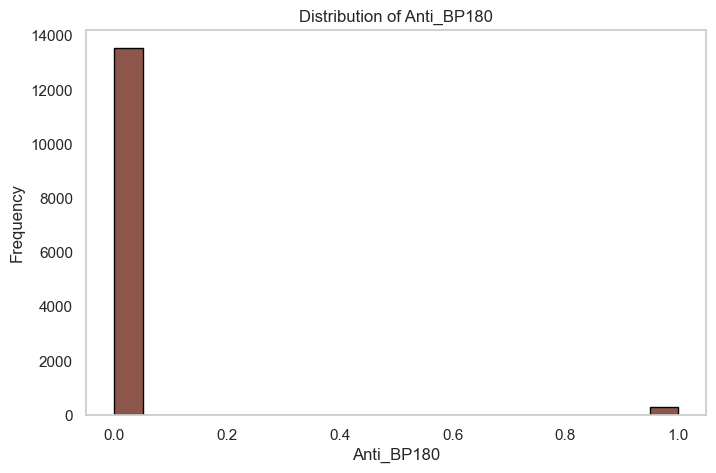

count    13812.000000
mean         0.006154
std          0.078209
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: ASMA, dtype: float64


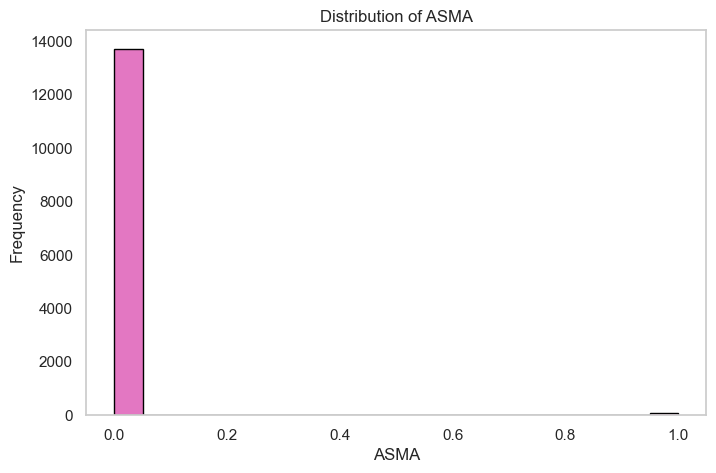

count    13812.000000
mean         0.001231
std          0.035063
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_IF, dtype: float64


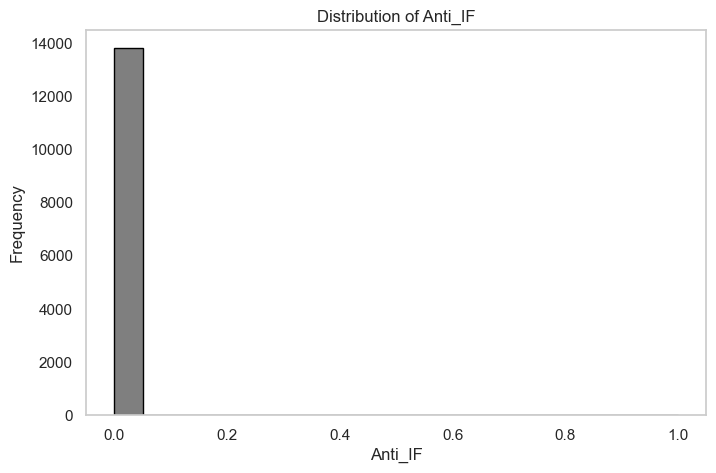

count    13812.000000
mean         0.004344
std          0.065768
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: IgG_IgE_receptor, dtype: float64


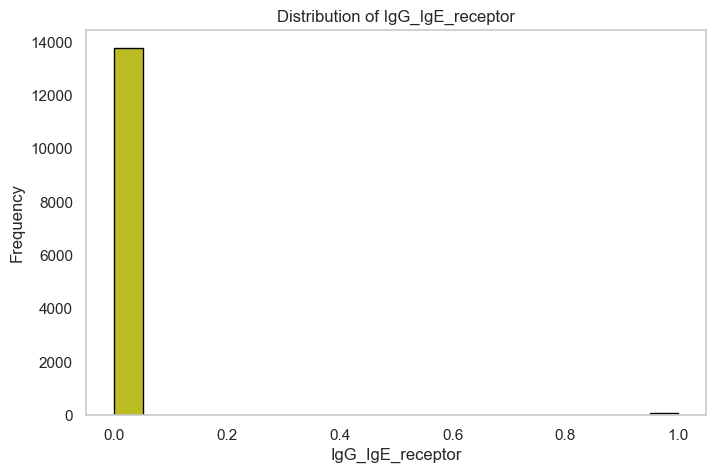

count    13812.00000
mean         0.00362
std          0.06006
min          0.00000
5%           0.00000
10%          0.00000
20%          0.00000
30%          0.00000
40%          0.00000
50%          0.00000
60%          0.00000
70%          0.00000
80%          0.00000
90%          0.00000
95%          0.00000
99%          0.00000
max          1.00000
Name: Anti_SRP, dtype: float64


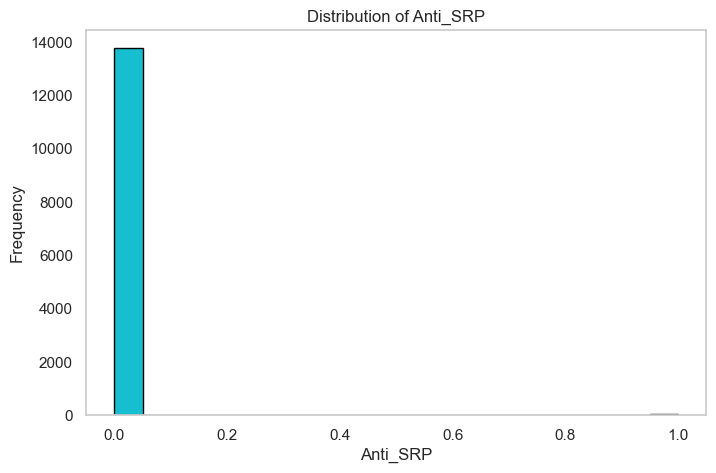

count    13812.000000
mean         0.000507
std          0.022507
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_desmoglein_3, dtype: float64


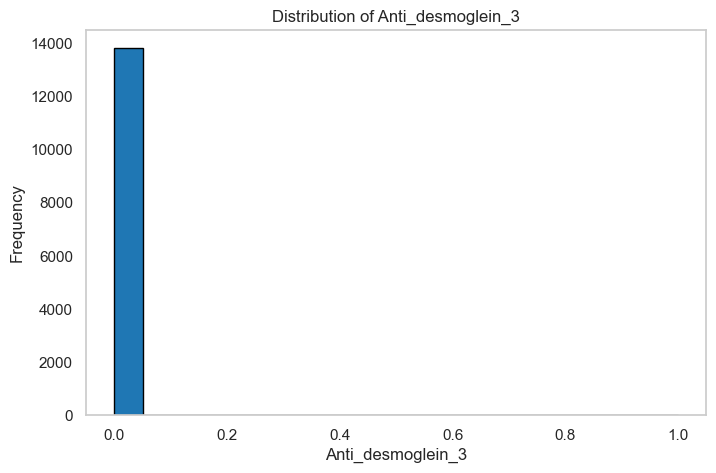

count    13812.000000
mean         0.000941
std          0.030666
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_La_SSB, dtype: float64


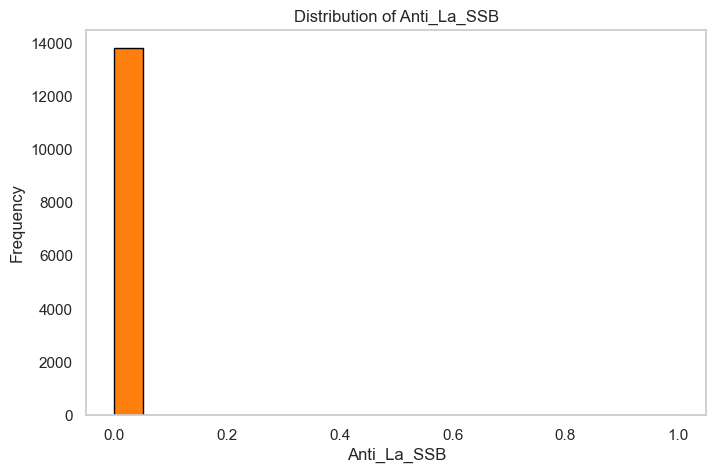

count    13812.00000
mean         0.00362
std          0.06006
min          0.00000
5%           0.00000
10%          0.00000
20%          0.00000
30%          0.00000
40%          0.00000
50%          0.00000
60%          0.00000
70%          0.00000
80%          0.00000
90%          0.00000
95%          0.00000
99%          0.00000
max          1.00000
Name: Anti_Jo1, dtype: float64


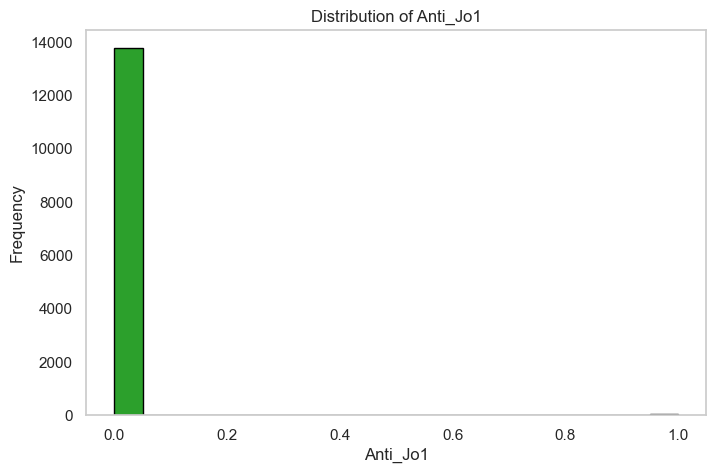

count    13812.000000
mean         0.007385
std          0.085621
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: ANCA, dtype: float64


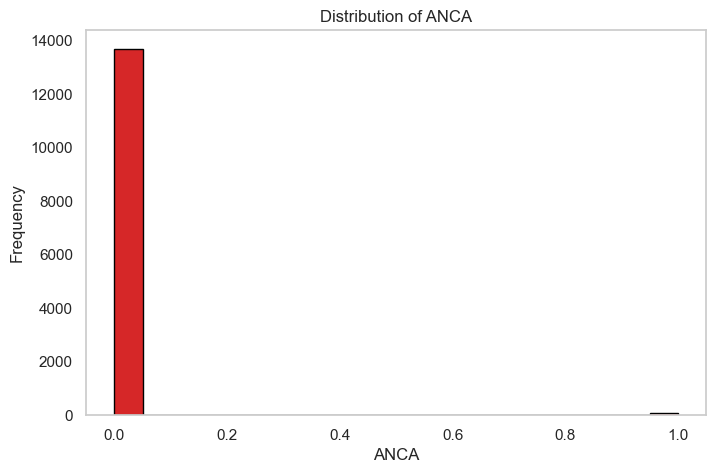

count    13812.000000
mean         0.007168
std          0.084361
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: anti_centromere, dtype: float64


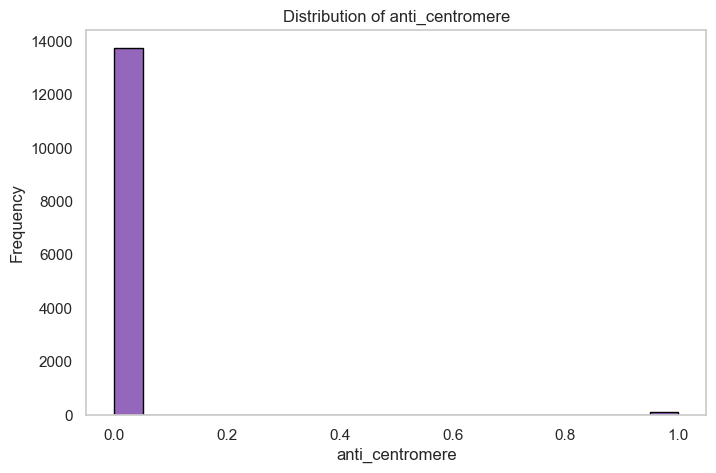

count    13812.000000
mean         0.000507
std          0.022507
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_desmoglein_1, dtype: float64


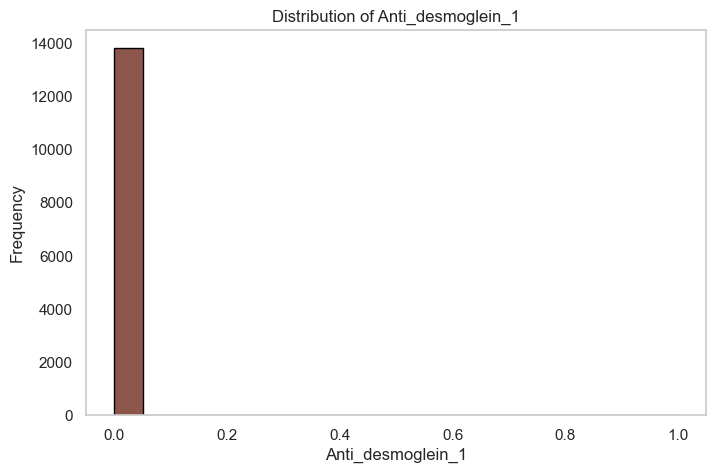

count    13812.000000
mean         0.001086
std          0.032938
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: EMA, dtype: float64


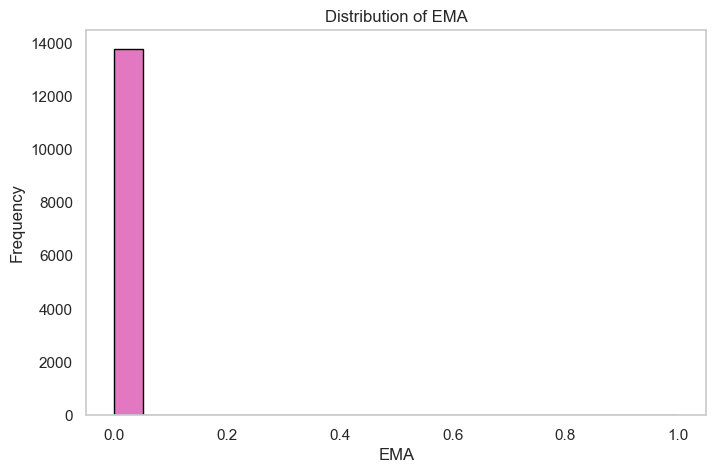

count    13812.000000
mean         0.002679
std          0.051690
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_type_VII_collagen, dtype: float64


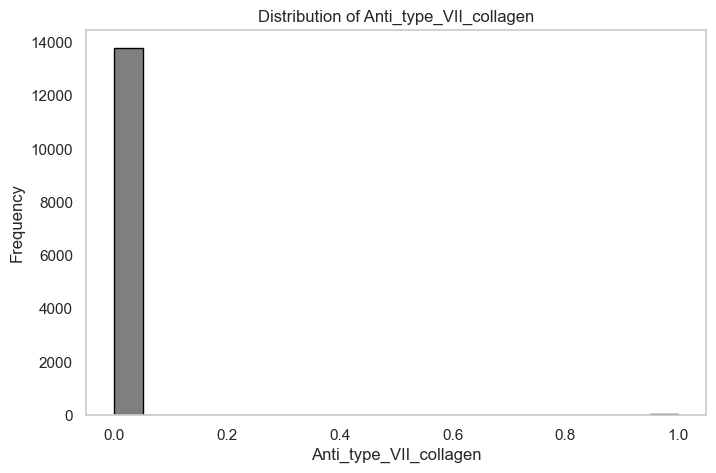

count    13812.000000
mean         0.013611
std          0.115875
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          1.000000
max          1.000000
Name: C1_inhibitor, dtype: float64


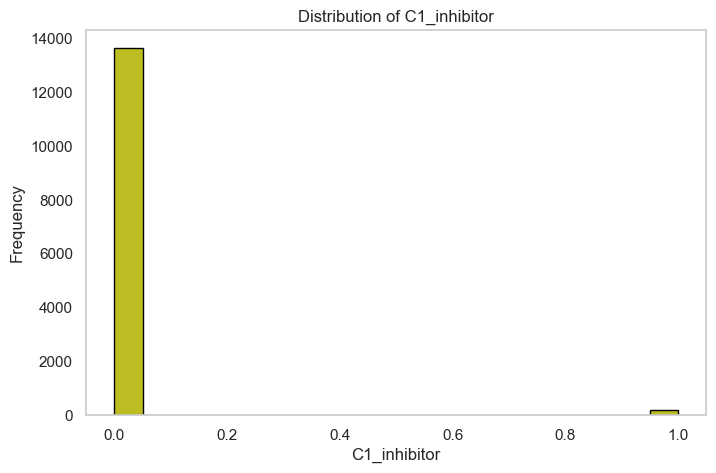

count    13812.00000
mean         0.00362
std          0.06006
min          0.00000
5%           0.00000
10%          0.00000
20%          0.00000
30%          0.00000
40%          0.00000
50%          0.00000
60%          0.00000
70%          0.00000
80%          0.00000
90%          0.00000
95%          0.00000
99%          0.00000
max          1.00000
Name: Anti_TIF1, dtype: float64


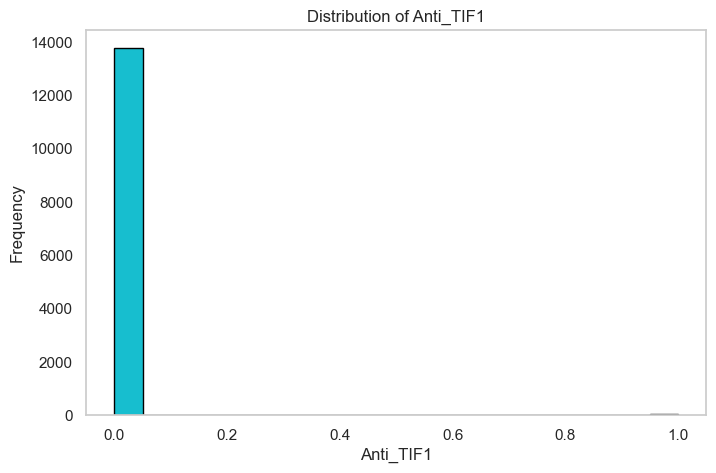

count    13812.000000
mean         0.004054
std          0.063548
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_epidermal_basement_membrane_IgA, dtype: float64


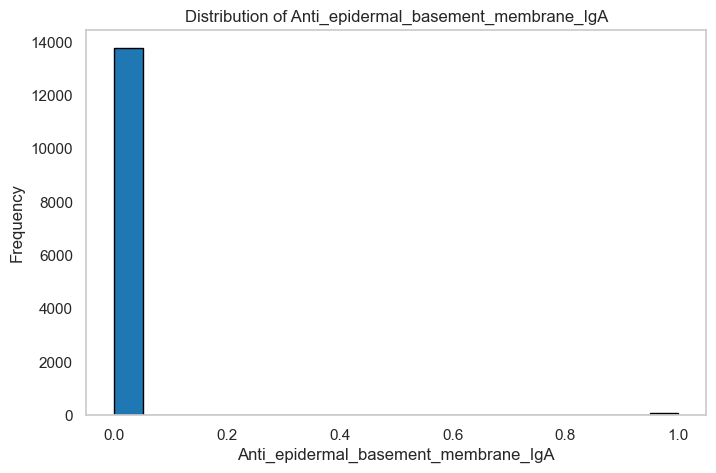

count    13812.000000
mean         0.007385
std          0.085621
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_OmpC, dtype: float64


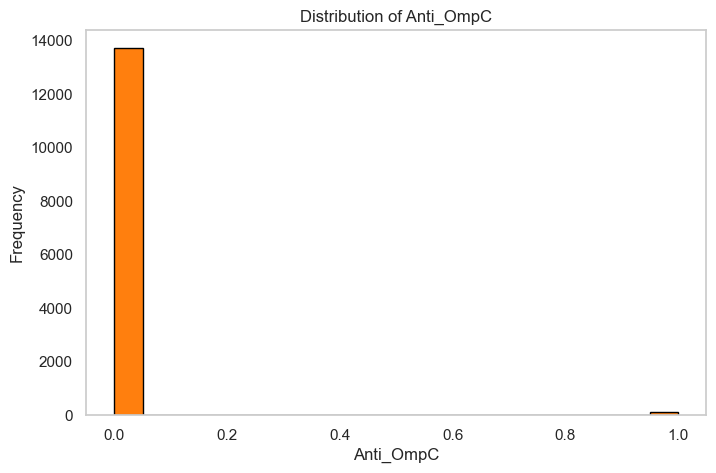

count    13812.000000
mean         0.000724
std          0.026899
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: pANCA, dtype: float64


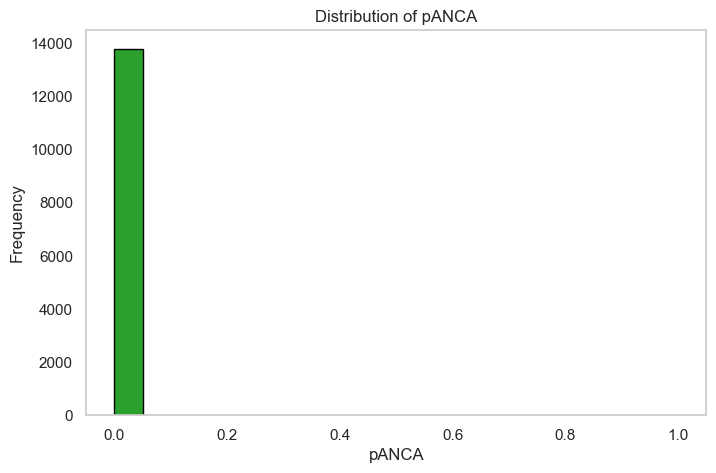

count    13812.000000
mean         0.017593
std          0.131473
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          1.000000
max          1.000000
Name: Anti_tissue_transglutaminase, dtype: float64


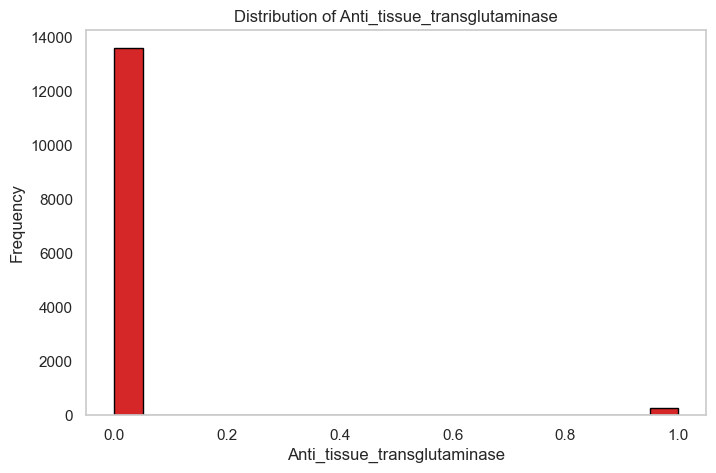

count    13812.000000
mean         0.007168
std          0.084361
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: anti_Scl_70, dtype: float64


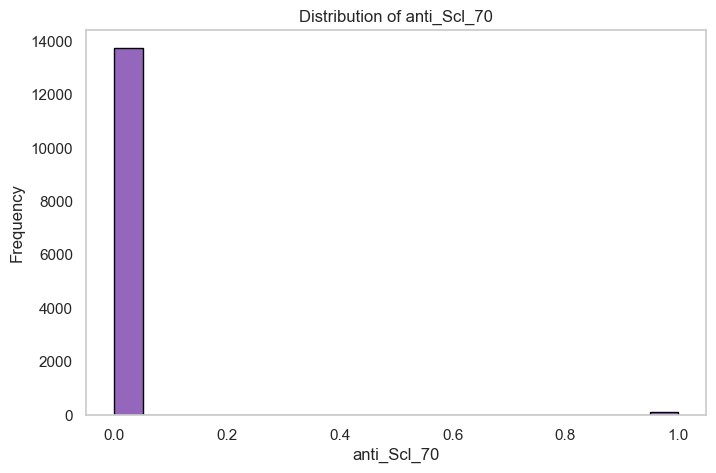

count    13812.00000
mean         0.00362
std          0.06006
min          0.00000
5%           0.00000
10%          0.00000
20%          0.00000
30%          0.00000
40%          0.00000
50%          0.00000
60%          0.00000
70%          0.00000
80%          0.00000
90%          0.00000
95%          0.00000
99%          0.00000
max          1.00000
Name: Anti_Mi2, dtype: float64


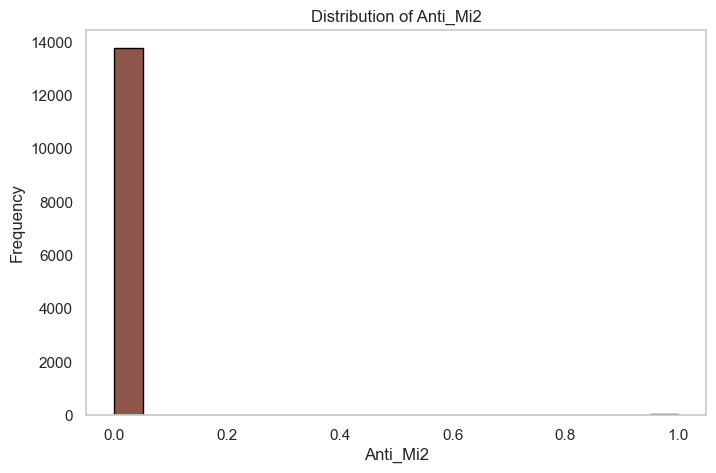

count    13812.000000
mean         0.001231
std          0.035063
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_parietal_cell, dtype: float64


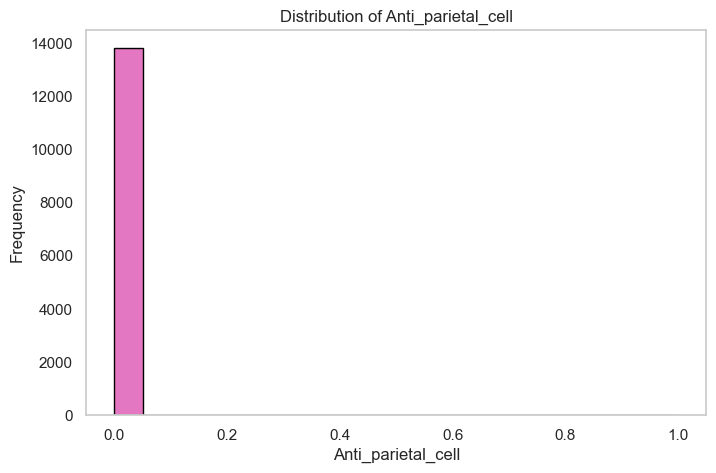

count    13812.0
mean         0.0
std          0.0
min          0.0
5%           0.0
10%          0.0
20%          0.0
30%          0.0
40%          0.0
50%          0.0
60%          0.0
70%          0.0
80%          0.0
90%          0.0
95%          0.0
99%          0.0
max          0.0
Name: Progesterone_antibodies, dtype: float64


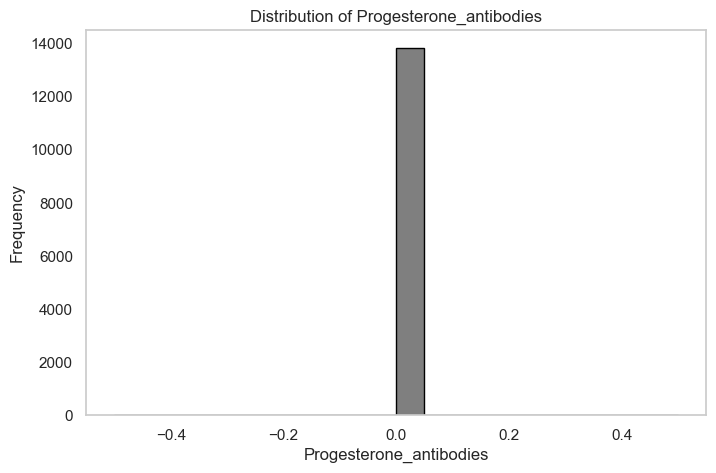

count    13812.000000
mean         0.002968
std          0.054404
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%          0.000000
max          1.000000
Name: Anti_Sm, dtype: float64


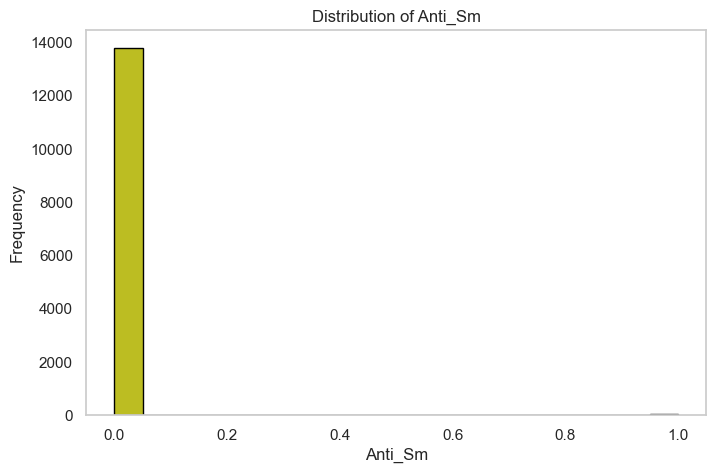

count    13812.000000
mean         0.653552
std          1.067056
min          0.000007
5%           0.029153
10%          0.059752
20%          0.117712
30%          0.176345
40%          0.236484
50%          0.296318
60%          0.355225
70%          0.415363
80%          0.475528
90%          2.227235
95%          3.561894
99%          4.709999
max          4.999038
Name: MBL, dtype: float64


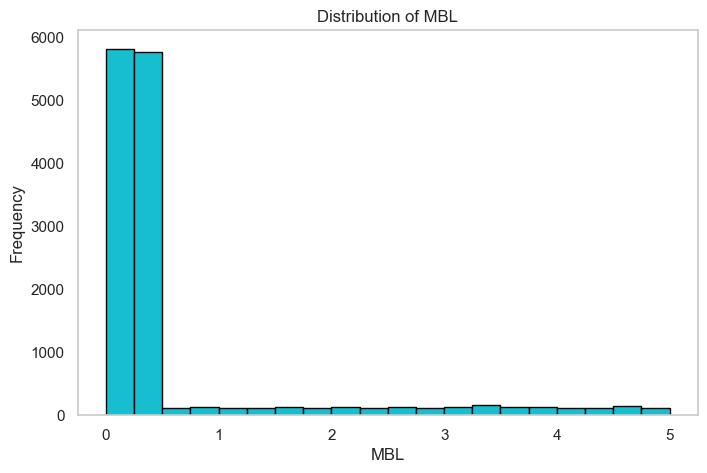

In [21]:
# Sayısal sütunları belirleme
num_cols = [col for col in df_int.columns if df_int[col].dtypes != "O"]

# Renk paleti ayarlama (10 farklı renk içeren bir palet)
colors = plt.cm.tab10.colors  

# Fonksiyon tanımı
def num_summary(dataframe, numerical_col, plot=False, color=None):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    
    # Sayısal verinin özet istatistiklerini yazdırma
    print(dataframe[numerical_col].describe(quantiles).T)
    
    # Grafik çizme seçeneği aktifse
    if plot:
        plt.figure(figsize=(8, 5))  # Grafik boyutunu ayarlama
        dataframe[numerical_col].hist(bins=20, color=color, edgecolor="black")
        plt.xlabel(numerical_col)
        plt.ylabel("Frequency")
        plt.title(f"Distribution of {numerical_col}")
        plt.grid(False)
        plt.show()  # Her sütun için ayrı grafik oluşturur

# Döngü içinde her sütun için fonksiyonu çağırma
for i, col in enumerate(num_cols):
    color = colors[i % len(colors)]  # Renkleri döngüyle seç
    num_summary(df_int, col, plot=True, color=color)


In [22]:
exclude_columns = ['Patient_ID',"Anti-tTG","Progesterone_antibodies"]  # Örnek olarak bu sütunları hariç tutuyoruz

# Hariç tutulan sütunlar dışında kalanları seçme
df_selected = df_int.drop(columns=exclude_columns, errors='ignore')

corr = df_selected.corr()
corr

Age    Gender  Diagnosis  \
Age                       1.000000 -0.127090  -0.005497   
Gender                   -0.127090  1.000000   0.067292   
Diagnosis                -0.005497  0.067292   1.000000   
Sickness_Duration_Months -0.058595 -0.038592  -0.040065   
RBC_Count                 0.001570 -0.127740  -0.369889   
...                            ...       ...        ...   
anti_Scl_70               0.060598 -0.081743  -0.045975   
Anti_Mi2                 -0.033066  0.062653   0.024889   
Anti_parietal_cell        0.038751 -0.033773   0.051380   
Anti_Sm                  -0.019729  0.011434   0.079861   
MBL                       0.025648 -0.048407  -0.553050   

                          Sickness_Duration_Months  RBC_Count  Hemoglobin  \
Age                                      -0.058595   0.001570    0.054150   
Gender                                   -0.038592  -0.127740   -0.070954   
Diagnosis                                -0.040065  -0.369889   -0.314685   
Sickness_Duration_Months                  1.000000   0.052296    0.048471   
RBC_Count                                 0.052296   1.000000    0.287567   
...                                            ...        ...         ...   
anti_Scl_70                               0.135230   0.091292    0.100334   
Anti_Mi2                                  0.038370   0.021856   -0.004805   
Anti_parietal_cell                        0.035948   0.028203    0.003507   
Anti_Sm                                  -0.032719  -0.007727    0.004556   
MBL                                       0.032330   0.507075    0.420308   

                          Hematocrit       MCV       MCH      MCHC  ...  \
Age                         0.049928 -0.000999 -0.009765  0.068976  ...   
Gender                     -0.174527  0.024472  0.011769 -0.033430  ...   
Diagnosis                  -0.193796  0.024201 -0.088890 -0.079095  ...   
Sickness_Duration_Months    0.012213 -0.103807  0.016538  0.029499  ...   
RBC_Count                   0.278960  0.015219  0.071496  0.093687  ...   
...                              ...       ...       ...       ...  ...   
anti_Scl_70                 0.096275 -0.026172  0.018302 -0.007440  ...   
Anti_Mi2                   -0.030637 -0.023310  0.000484 -0.027704  ...   
Anti_parietal_cell         -0.010873 -0.019608 -0.066033  0.024949  ...   
Anti_Sm                    -0.000196 -0.007601 -0.036688 -0.006327  ...   
MBL                         0.297764  0.021813  0.076137  0.134090  ...   

                          Anti_TIF1  Anti_epidermal_basement_membrane_IgA  \
Age                       -0.033066                             -0.037448   
Gender                     0.062653                              0.066320   
Diagnosis                  0.024889                             -0.049605   
Sickness_Duration_Months   0.038370                             -0.008578   
RBC_Count                  0.021856                              0.029632   
...                             ...                                   ...   
anti_Scl_70               -0.005121                             -0.005421   
Anti_Mi2                   1.000000                             -0.003846   
Anti_parietal_cell        -0.002116                             -0.002240   
Anti_Sm                   -0.003289                             -0.003481   
MBL                        0.017366                              0.102487   

                          Anti_OmpC     pANCA  Anti_tissue_transglutaminase  \
Age                        0.039664 -0.014492                      0.070443   
Gender                    -0.025436 -0.025896                     -0.018521   
Diagnosis                 -0.014437  0.039396                     -0.099880   
Sickness_Duration_Months   0.077204 -0.002875                      0.171864   
RBC_Count                  0.056309  0.025989                      0.116644   
...                             ...       ...                           ...   
anti_Scl_70       

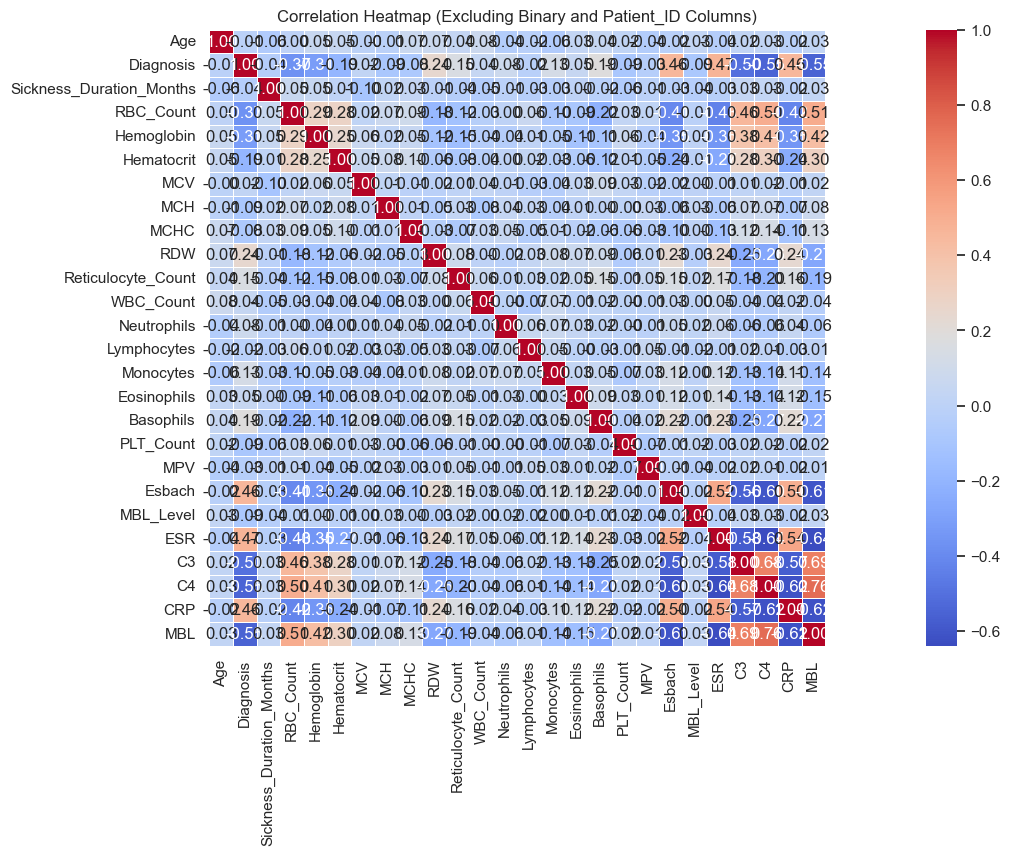

Correlation Matrix


In [23]:
# Binary ve Patient_ID kolonlarını hariç tutarak sadece sayısal değişkenleri seçme
excluded_columns = ['Patient_ID',"Anti_tTG","Progesterone_antibodies"]
binary_columns = [col for col in df_int.columns if df_int[col].nunique() == 2]  # Binary değişkenleri bul
excluded_columns.extend(binary_columns)

# Heatmap için kullanılacak sadece sayısal değişkenleri seçme
df_heatmap = df_int.drop(columns=excluded_columns, errors='ignore')

# Korelasyon matrisini hesaplama
correlation_matrix = df_heatmap.corr()

# Heatmap çizme
plt.figure(figsize=(26, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title("Correlation Heatmap (Excluding Binary and Patient_ID Columns)")
plt.show()

# Sonuçları ekrana yazdırma
import ace_tools_open as tools
tools.display_dataframe_to_user(name="Correlation Matrix", dataframe=correlation_matrix)

**General Description:**<br/>

1. Matrix Structure:

- Each cell in the heatmap represents the correlation coefficient between two variables.<br/>
- Variables are listed along both the x-axis and y-axis.<br/>

2. Color Scheme (cmap="RdBu"):

The RdBu colormap is used:<br/>
- Red (Positive Correlation): Indicates that two variables are positively correlated (as one increases, the other also tends to increase).<br/>
- Blue (Negative Correlation): Indicates a negative correlation (as one increases, the other tends to decrease).<br/>
- White/Light Shades: Near-zero correlations, implying no strong linear relationship.<br/>

3. Annotations (annot=corr_values):<br/>

-Each cell is annotated with the numerical value of the correlation coefficient (rounded to two decimal places).

**Key Correlation Coefficients:**<br/>

1. Range of Values:

Values range from -1 to 1:<br/>
   - +1: Perfect positive linear relationship.<br/>
   - -1: Perfect negative linear relationship.<br/>
   -  0: No linear relationship.<br/>
     
2. Strong Correlations:

- Cells with values close to +1 or -1 (intense red or blue shades) indicate strong relationships.<br/>
- Look for clusters of strong correlations to identify groups of variables that are highly related.

3. Weak/No Correlations:

- Cells near 0 (white or light shades) suggest weak or no linear relationship between the variables.

**How to Use the Heatmap:**<br/>

1. Identify Highly Correlated Variables:

- Strong positive correlations (e.g., close to +1) suggest variables that might contain redundant information.
- Strong negative correlations (e.g., close to -1) suggest inverse relationships.<br/>

2. Feature Selection:

- If two variables are strongly correlated, consider removing one from your model to reduce multicollinearity.

3. Data Relationships:

- The heatmap helps you quickly spot trends and relationships in the data that might not be immediately apparent.

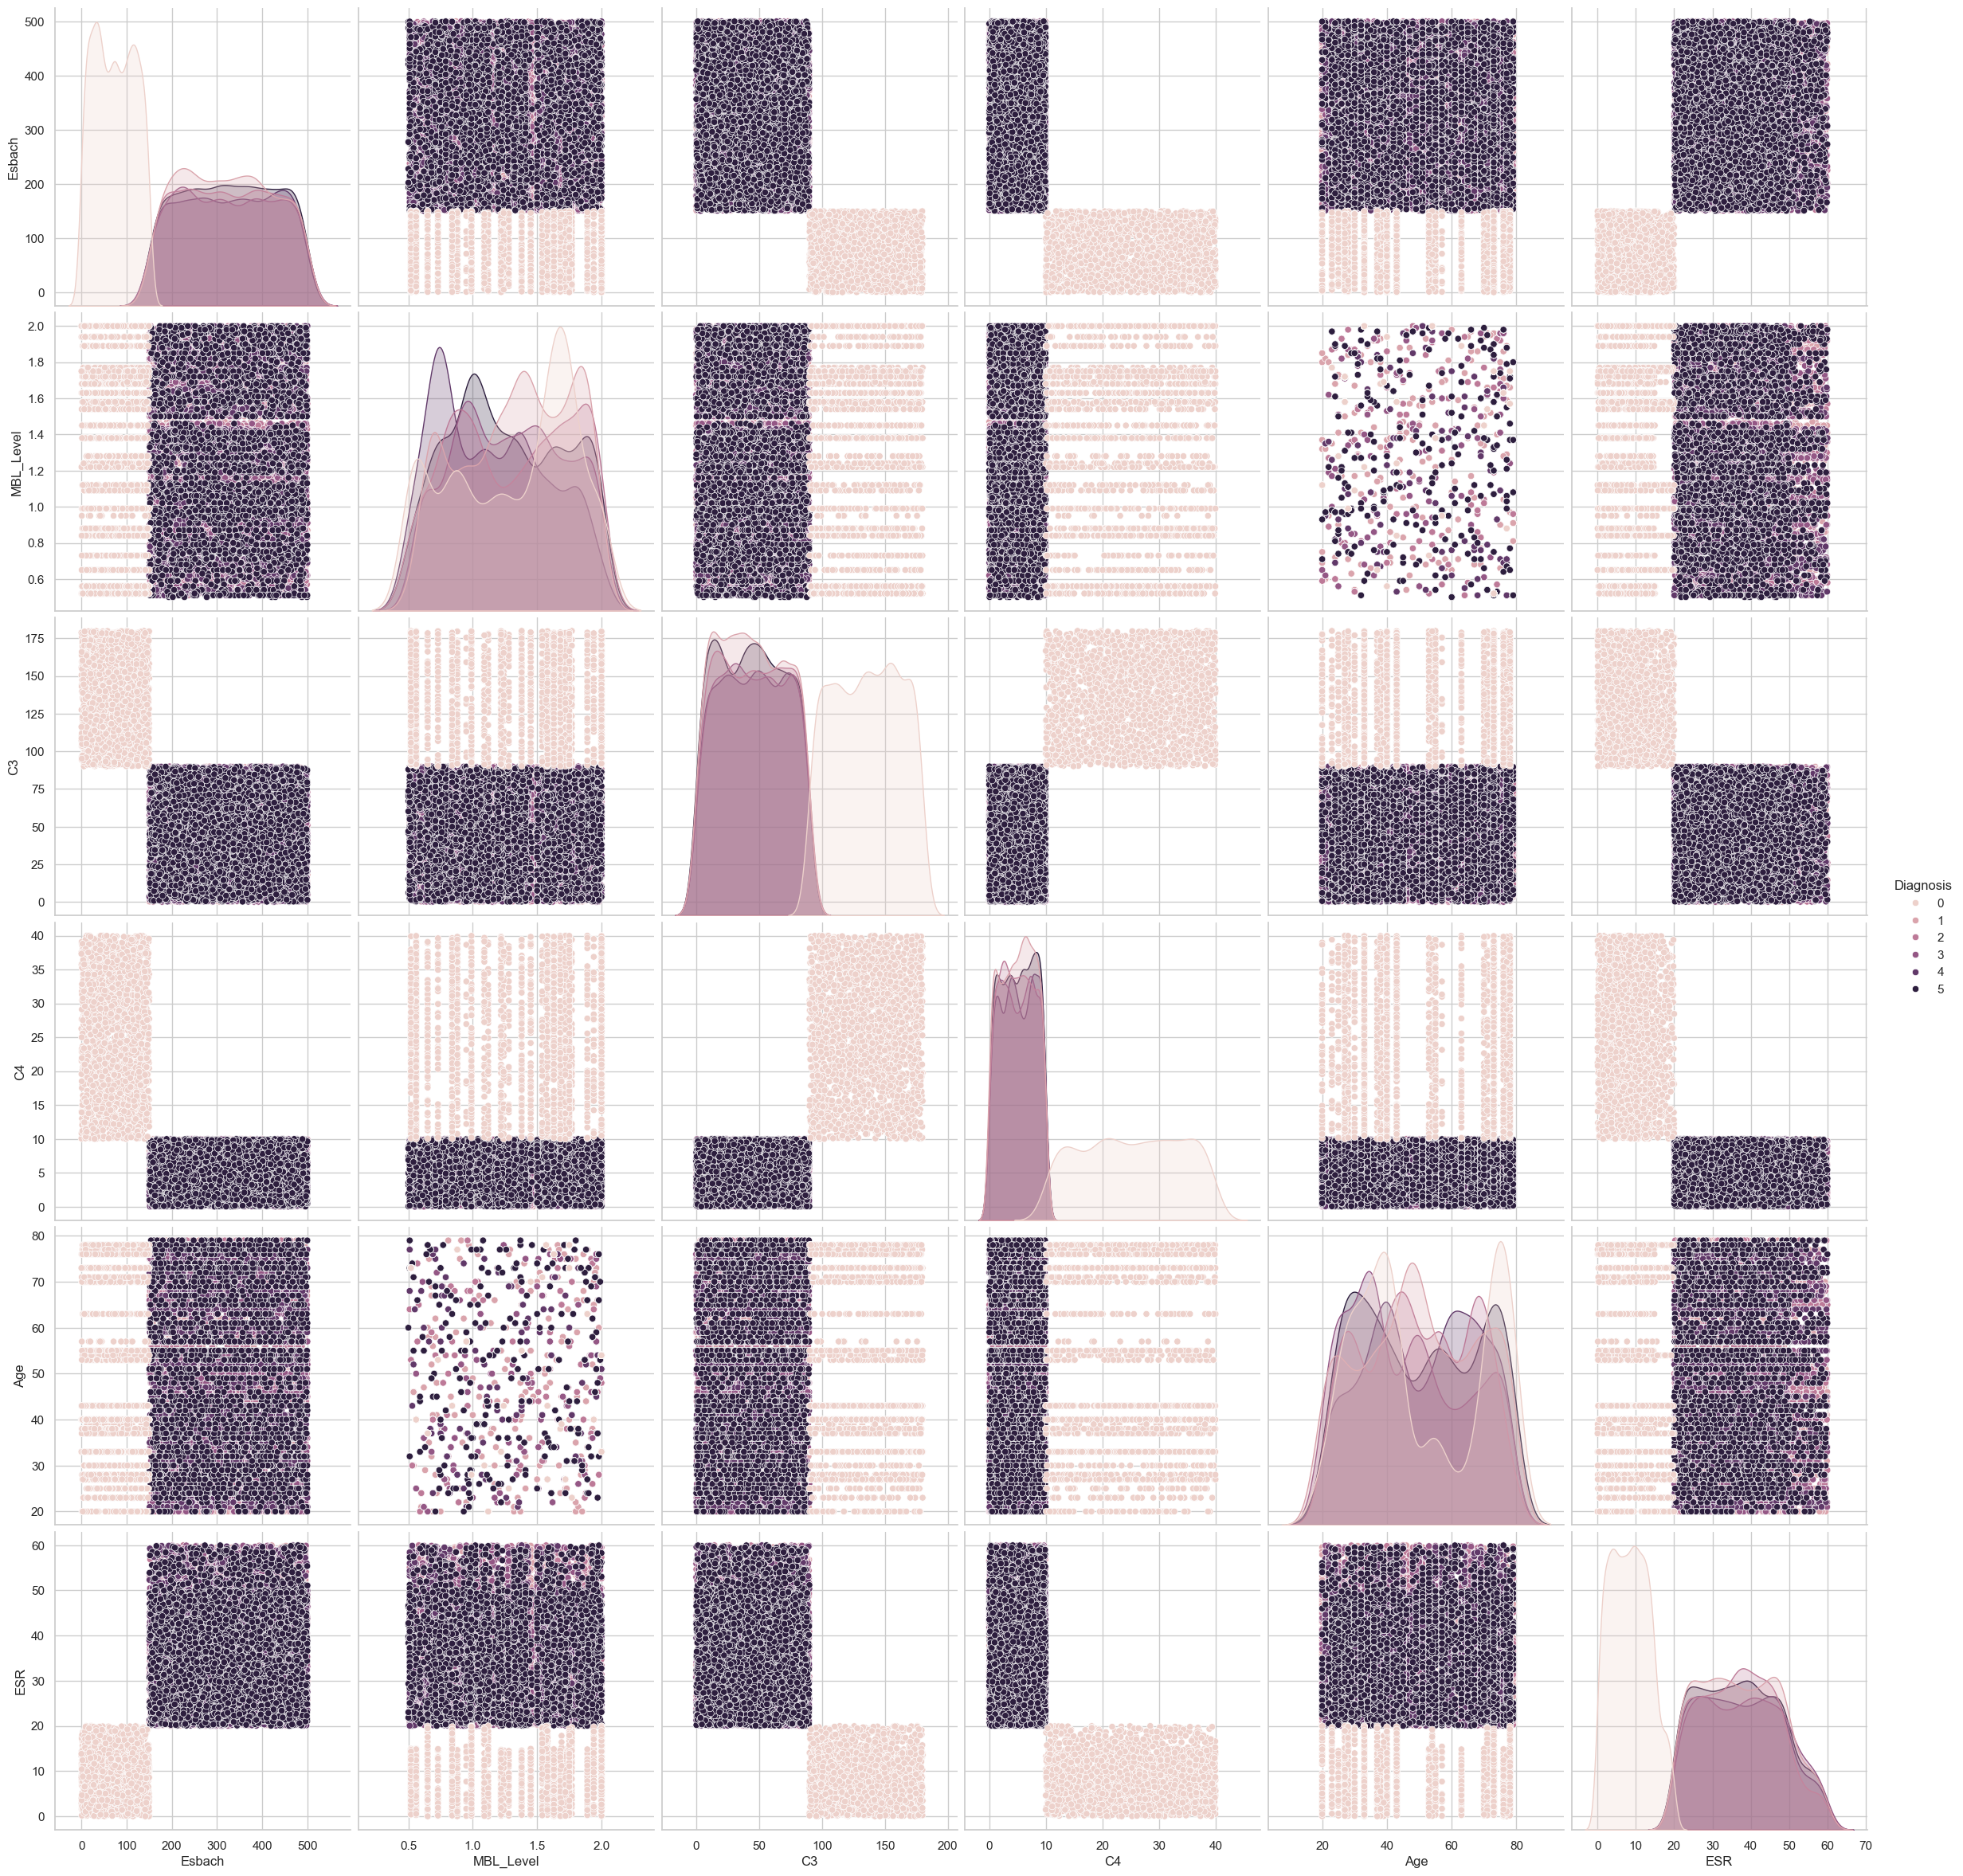

In [24]:
sns.pairplot(data=df_int,vars=['Esbach', 'MBL_Level', 'C3',"C4", 'Age',"ESR"], hue='Diagnosis',height=4)
plt.show(block=True)

In [25]:
# Özellik kombinasyonlarını oluştur
feature_combinations = list(itt.combinations(['Esbach', 'MBL_Level', 'C3', "C4", 'Age', "ESR"], 2))

for i, (feature1, feature2) in enumerate(feature_combinations):
    fig = px.scatter(df_int, x=feature1, y=feature2, color='Diagnosis',
                     title=f'{feature1} vs {feature2} Bubble Chart')

    fig.write_image(f"bubble_chart_{i}.png")  # Grafik dosyasını PNG olarak kaydet

In [26]:
# İstenilen sütunları seçme
selected_columns_for_ML = ["Esbach", 'MBL_Level', 'C3',"C4", 'Age',"ESR","Diagnosis"]

ML_filtered_df_int = df_int[selected_columns_for_ML].copy()
ML_filtered_df_int

Esbach  MBL_Level          C3         C4  Age        ESR  Diagnosis
0      154.915372       0.71   14.274072   8.281658   62  21.470329          1
1      447.570310       1.58    2.083559   6.555046   54  31.601330          1
2      236.292853       1.18   73.459310   6.957688   34  27.346259          1
3      239.695961       0.95   67.439371   4.355488   22  23.728429          1
4      466.374954       1.37   54.250929   7.824894   20  30.440890          1
...           ...        ...         ...        ...  ...        ...        ...
13807  101.731314       1.09   91.273470  32.020403   30  19.254554          0
13808   25.991969       1.75   91.277690  17.879366   78   3.528217          0
13809   81.750752       1.22  177.640134  10.541387   33  12.557989          0
13810  116.281738       0.65  120.180540  15.614936   37  12.323572          0
13811   96.928630       0.52  133.130671  36.576699   73  12.567959          0

[13812 rows x 7 columns]

### Base Model Before Feature Engineering

In [27]:
from sklearn import tree
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer

In [64]:
from sklearn.model_selection import train_test_split

# Bağımlı ve bağımsız değişkenleri doğru seçtiğinden emin ol
X = df_int.drop(columns=["Diagnosis"])  # Bağımsız değişkenler
y = df_int["Diagnosis"]  # Bağımlı değişken

# Tekrar train-test bölmesi yap
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (9668, 79)
y_train shape: (9668,)
X_test shape: (4144, 79)
y_test shape: (4144,)


In [44]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

#### Comparison of Metrics for Different Models

In [45]:
# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelleri tanımlayın
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Performans metriklerini hesaplamak için boş bir sözlük
metrics = {"Model": [], "Accuracy": [], "Recall": [], "Precision": [], "F1": [], "AUC": []}

# Modelleri döngü içinde eğitip test edin
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrikleri hesapla ve sözlüğe ekle
    metrics["Model"].append(name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred, average='micro'))
    metrics["Precision"].append(precision_score(y_test, y_pred, average='micro'))
    metrics["F1"].append(f1_score(y_test, y_pred, average='micro'))
    
    if hasattr(model, "predict_proba") and len(model.classes_) > 1:
        y_prob = model.predict_proba(X_test)
        metrics["AUC"].append(roc_auc_score(y_test, y_prob, multi_class='ovr'))
    else:
        metrics["AUC"].append(None)

# DataFrame oluştur
results_df = pd.DataFrame(metrics)

# Accuracy'e göre sıralama
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Grafik için renkler
colors = ["purple", "green", "blue", "orange", "red"]

# Grafik oluştur
fig = go.Figure()

# Her bir metriği grafiğe ekleme
for metric, color in zip(["Accuracy", "Recall", "Precision", "F1", "AUC"], colors):
    fig.add_trace(go.Bar(
        x=results_df['Model'],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric].round(4),  # Daha temiz bir görüntü için sayıları yuvarla
        textposition='auto'
    ))

# Grafik düzenlemeleri
fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Metric Score',
    title='Comparison of Metrics for Different Models',
    barmode='group',  # Barları gruplayarak yan yana göstermek
    legend_title="Metrics"
)

# Grafiği göster
fig.show()

**Conclusion**

**Accuracy:** Accuracy represents the overall correctness rate of the model's predictions. It indicates the proportion of correctly classified cases out of the total data.

**Recall:** Recall measures the proportion of actual diabetic cases that are correctly identified by the model. It shows how well the model captures the true positive cases of diabetes.

**Precision:** Precision calculates the proportion of predicted diabetic cases that are actually true positive cases. It indicates the accuracy of the model's positive predictions for diabetes.

**F1 Score:** F1 score is the harmonic mean of recall and precision. It provides a balanced measure by considering both recall and precision equally, evaluating the overall performance of the model.

**AUC (Area Under the Curve):** AUC represents the area under the Receiver Operating Characteristic (ROC) curve. It reflects the model's ability to distinguish between classes and provides an overall measure of performance.

#### Overfitting Control

In [46]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x, y, cv=5)
print(f"Cross-validation scores: {scores}")
print(f"Average score: {scores.mean()}")

Cross-validation scores: [0.3669924  0.38038364 0.3826937  0.36350471 0.37328023]
Average score: 0.37337093584065634


#### One Class Model Control

In [47]:
print(pd.Series(y_pred).value_counts())

1    794
2    740
4    665
3    653
5    649
0    643
Name: count, dtype: int64


In [48]:
print(pd.Series(y_test).value_counts())  # Test setindeki gerçek sınıf dağılımı

Diagnosis
1    758
5    729
2    695
4    666
3    653
0    643
Name: count, dtype: int64


### Feature Selection

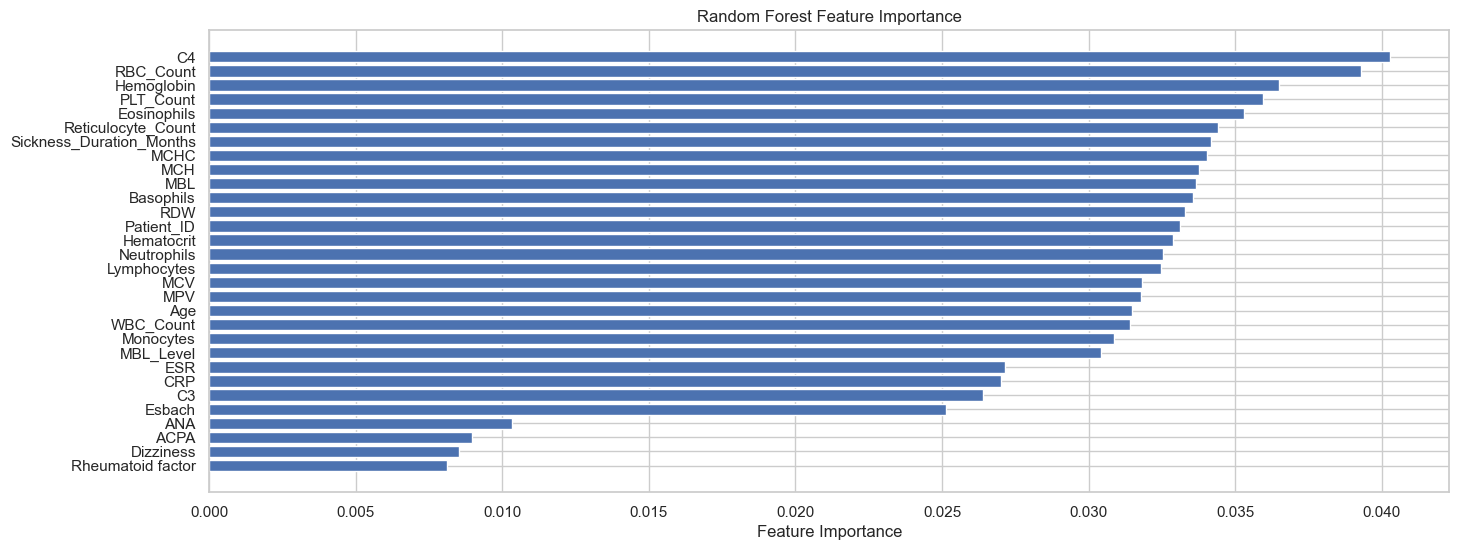

In [59]:
feature_importance = rf_model.feature_importances_
features = X_train.columns
sorted_idx = np.argsort(feature_importance)[-30:]

plt.figure(figsize=(16, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [61]:
print(f"X_train shape: {X_train.shape}")  # (satır_sayısı, sütun_sayısı)
print(f"y_train shape: {y_train.shape}")  # (satır_sayısı,)

X_train shape: (9668, 79)
y_train shape: (13809, 1)


In [66]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # X_train ile aynı indeksleri kullan

In [67]:
X_train = X_train.loc[y_train.index]

#### GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                           param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.9901741429940227


In [80]:
best_params = grid_search.best_params_

rf_best = RandomForestClassifier(**best_params, random_state=42, n_jobs=-1)
rf_best.fit(X_train, y_train)

# Test seti üzerinde tahmin yap
y_pred_best = rf_best.predict(X_test)

# Modelin gerçek doğruluğunu hesapla
test_accuracy = accuracy_score(y_test, y_pred_best)

print("Final Model Test Accuracy:", test_accuracy)

Final Model Test Accuracy: 0.9903474903474904


#### RandomizedSearchCV

In [110]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_grid,  # Parametre aralığı
    n_iter=20,  # Rastgele 20 kombinasyon dene
    cv=5, 
    scoring='accuracy', 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Best Accuracy: 0.9901741429940227


"Fitting 5 folds for each of 20 candidates, totalling 100 fits"</br>

- 20 farklı hiperparametre kombinasyonu denendi.</br>
- 5 katlı çapraz doğrulama (5-fold CV) uygulandı.</br>
- Toplam 20 x 5 = 100 model eğitildi ve test edildi.</br>

"Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10, 'bootstrap': True}"</br>
- Model için en iyi hiperparametreler bulundu.</br>
- n_estimators=200 → 200 ağaçlı bir Random Forest en iyi sonucu verdi.</br>
- min_samples_split=2 → Bir düğümün bölünmesi için en az 5 örnek gerek.</br>
- min_samples_leaf=1 → Bir yaprak düğümde en az 2 örnek olmalı.</br>
- max_depth=10 → Maksimum ağaç derinliği 10 olarak belirlendi.</br>
- bootstrap=True → Örnekleme yöntemi olarak Bootstrap seçildi.</br>

"Best Accuracy: 0.99017414"</br>
- Ortalama doğruluk oranı (Cross-Validation sonucu) %99.00 çıktı!</br>

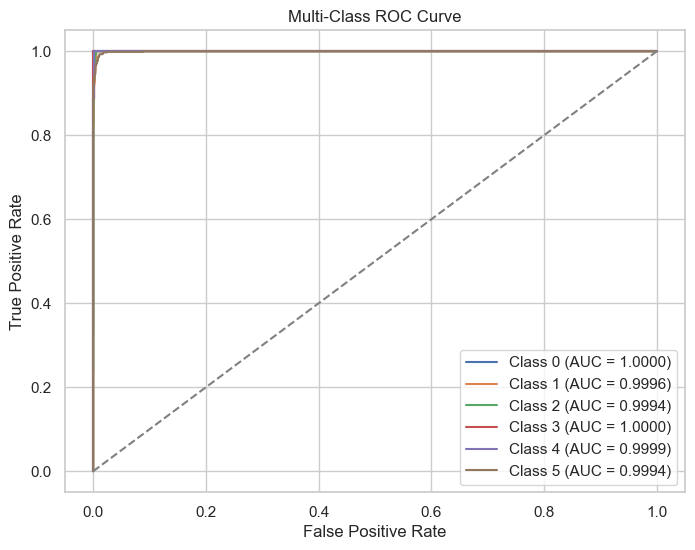

In [111]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Çok sınıflı veriyi binarize et
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# ROC eğrisini çizmek için grafik
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob_best[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.4f})')

# Rastgele model için diagonal çizgi
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend()
plt.show()

In [113]:
train_acc = accuracy_score(y_train, random_search.predict(X_train))
test_acc = accuracy_score(y_test, random_search.predict(X_test))

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.9929
Test Accuracy: 0.9903


## TENSORFLOW

### Extract the data from the csv

In [115]:
raw_csv_data = pd.read_csv('E:\\Veri Bilimi Topluluğu\\proje-AID\\github\\Complete_Updated_Autoimmune_Disorder_Dataset_int.csv')

# The inputs are all columns in the csv, except for the first one [:,0]
# (which is just the arbitrary customer IDs that bear no useful information),
# and the last one [:,-1] (which is our targets)

unscaled_inputs_all = raw_csv_data.iloc[:, 1:-1].values

# The targets are in the last column. That's how datasets are conventionally organized.
targets_all = raw_csv_data.iloc[:,-1].values

### Balance the dataset

In [116]:
# Count how many targets are 1 (meaning that the customer did convert)
num_one_targets = int(np.sum(targets_all))

# Set a counter for targets that are 0 (meaning that the customer did not convert)
zero_targets_counter = 0

# We want to create a "balanced" dataset, so we will have to remove some input/target pairs.
# Declare a variable that will do that:
indices_to_remove = []

# Count the number of targets that are 0. 
# Once there are as many 0s as 1s, mark entries where the target is 0.
for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

# Create two new variables, one that will contain the inputs, and one that will contain the targets.
# We delete all indices that we marked "to remove" in the loop above.
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis=0)
targets_equal_priors = np.delete(targets_all, indices_to_remove, axis=0)

### Standardize the inputs

In [117]:
from sklearn import preprocessing

# That's the only place we use sklearn functionality. We will take advantage of its preprocessing capabilities
# It's a simple line of code, which standardizes the inputs, as we explained in one of the lectures.
# At the end of the business case, you can try to run the algorithm WITHOUT this line of code. 
# The result will be interesting.
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

### Shuffle the data

In [118]:
# When the data was collected it was actually arranged by date
# Shuffle the indices of the data, so the data is not arranged in any way when we feed it.
# Since we will be batching, we want the data to be as randomly spread out as possible
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

# Use the shuffled indices to shuffle the inputs and targets.
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

### Split the dataset into train, validation, and test

In [119]:
# Count the total number of samples
samples_count = shuffled_inputs.shape[0]

# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)

# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count

# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

# We balanced our dataset to be 50-50 (for targets 0 and 1), but the training, validation, and test were 
# taken from a shuffled dataset. Check if they are balanced, too. Note that each time you rerun this code, 
# you will get different values, as each time they are shuffled randomly.
# Normally you preprocess ONCE, so you need not rerun this code once it is done.
# If you rerun this whole sheet, the npzs will be overwritten with your newly preprocessed data.

# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

7213.654356175967 11049 0.6528784827745467
846.2907452277566 1381 0.6128100979201713
966.9161239628968 1382 0.6996498726214883


### Save the three datasets in *.npz

In [120]:
# Save the three datasets in *.npz.
# In the next lesson, you will see that it is extremely valuable to name them in such a coherent way!
"""
np.savez('AutoImmuneDisease_data_train', inputs=train_inputs, targets=train_targets)
np.savez('AutoImmuneDisease_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('AutoImmuneDisease_data_test', inputs=test_inputs, targets=test_targets)
"""

In [121]:
# let's create a temporary variable npz, where we will store each of the three Audiobooks datasets
npz = np.load('AutoImmuneDisease_data_train.npz')

# we extract the inputs using the keyword under which we saved them
# to ensure that they are all floats, let's also take care of that
train_inputs = npz['inputs'].astype(float)
# targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)
train_targets = npz['targets'].astype(int)

# we load the validation data in the temporary variable
npz = np.load('AutoImmuneDisease_data_validation.npz')
# we can load the inputs and the targets in the same line
validation_inputs, validation_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

# we load the test data in the temporary variable
npz = np.load('AutoImmuneDisease_data_test.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(float), npz['targets'].astype(int)

In [126]:
import tensorflow as tf

# Set the input and output sizes
input_size = 10
output_size = 5
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50
    
# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])


### Choose the optimizer and the loss function

# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Training
# That's where we train the model we have built.

# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 100

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

# fit the model
# note that this time the train, validation and test data are not iterable
model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          # callbacks are functions called by a task when a task is completed
          # task here is to check if val_loss is increasing
          callbacks=[early_stopping], # early stopping
          validation_data=(validation_inputs, validation_targets), # validation data
          verbose = 2 # making sure we get enough information about the training process
          )  

Epoch 1/100
111/111 - 1s - 12ms/step - accuracy: 0.8679 - loss: 0.3757 - val_accuracy: 0.8689 - val_loss: 0.2677
Epoch 2/100
111/111 - 0s - 1ms/step - accuracy: 0.8804 - loss: 0.2559 - val_accuracy: 0.8747 - val_loss: 0.2589
Epoch 3/100
111/111 - 0s - 1ms/step - accuracy: 0.8847 - loss: 0.2507 - val_accuracy: 0.8682 - val_loss: 0.2630
Epoch 4/100
111/111 - 0s - 1ms/step - accuracy: 0.8866 - loss: 0.2478 - val_accuracy: 0.8711 - val_loss: 0.2636


### Test the model

In [127]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.8519 - loss: 0.3032


In [128]:
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))


Test loss: 0.30. Test accuracy: 85.82%


# Save the Model

In [ ]:
import nbformat
import os
from datetime import datetime
import ipynbname

def save_current_notebook_as_backup(save_directory):
    try:
        # Find current notebook
        notebook_path = ipynbname.path()

        # Create backup name with timestamp
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"AID_final_{timestamp}.ipynb"

        # Create backup index and save to notebook
        os.makedirs(save_directory, exist_ok=True)
        with open(notebook_path, 'r', encoding='utf-8') as f:
            notebook_content = nbformat.read(f, as_version=4)

        new_file_path = os.path.join(save_directory, filename)
        with open(new_file_path, 'w', encoding='utf-8') as f:
            nbformat.write(notebook_content, f)

        print(f"Notebook {new_file_path} olarak kaydedildi.")
        return new_file_path
    except Exception as e:
        print(f"Hata oluştu: {e}")

# Usage
save_current_notebook_as_backup("E:/Veri Bilimi Topluluğu/Diabetes with AI")